## Import Libraries

In [3]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('..')
from utils.plot import *

## Load the dataset

In [6]:
# Load testing data
data = pd.read_csv('https://raw.githubusercontent.com/ktxdev/mind-matters/refs/heads/master/data/raw/test.csv')

## Initial Exploration
### Shape and Structure

In [7]:
print(data.shape)
data.head()

(93800, 19)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


### Dropping Unwanted Features
- **id:** This is just a unique identifier for each person in the dataset, which does not contribute to predicting mental health outcomes.
- **Name:** This feature is not relevant to predicting depression and could introduce noise i.e it does not provide meaningful information for the model

In [8]:
data.drop(columns=['id', 'Name'], inplace=True)

### Rename columns

In [10]:
data.rename(columns={'Have you ever had suicidal thoughts ?': 'Had Suicidal Thoughts?'}, inplace=True)

## Data Types

In [11]:
data.dtypes

Gender                               object
Age                                 float64
City                                 object
Working Professional or Student      object
Profession                           object
Academic Pressure                   float64
Work Pressure                       float64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                    float64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Had Suicidal Thoughts?               object
Work/Study Hours                    float64
Financial Stress                    float64
Family History of Mental Illness     object
dtype: object

## Data Types Conversion

In [12]:
data['Study Satisfaction'] = data['Study Satisfaction'].astype('category')
data['Job Satisfaction'] = data['Job Satisfaction'].astype('category')
data['Academic Pressure'] = data['Academic Pressure'].astype('category')
data['Work Pressure'] = data['Work Pressure'].astype('category')
data['Financial Stress'] = data['Financial Stress'].astype('category')
data['Work/Study Hours'] = data['Work/Study Hours'].astype('category')

## Checking for Missing Values

In [13]:
missing_values_cols = data.isnull()
print('Missing value counts:\n')
print(missing_values_cols.sum()[missing_values_cols.sum() > 0])
print('\nMissing value percentages:\n')
print(round((missing_values_cols.mean()[missing_values_cols.mean() > 0]) * 100, 2))

Missing value counts:

Profession            24632
Academic Pressure     75033
Work Pressure         18778
CGPA                  75034
Study Satisfaction    75033
Job Satisfaction      18774
Dietary Habits            5
Degree                    2
dtype: int64

Missing value percentages:

Profession            26.26
Academic Pressure     79.99
Work Pressure         20.02
CGPA                  79.99
Study Satisfaction    79.99
Job Satisfaction      20.01
Dietary Habits         0.01
Degree                 0.00
dtype: float64


### Descriptive Statistics
#### Continuous Variables

In [16]:
data.describe()

,Age,CGPA
count,93800.000000,18766.000000
mean,40.321685,7.674016
std,12.393480,1.465056
min,18.000000,5.030000
25%,29.000000,6.330000
50%,42.000000,7.800000
75%,51.000000,8.940000
max,60.000000,10.000000


**Insights:**
- The age distribution closely aligns with that observed in the training dataset, indicating consistency across samples
- Similar to the training dataset, CGPA data is available for only a subset of the population, likely reflecting the portion representing students
- The CGPA median is comparable to that in the training dataset, suggesting similar academic performance levels across the samples

In [17]:
categorical_variables = ['Gender', 'City', 'Working Professional or Student', 'Study Satisfaction',
                         'Job Satisfaction', 'Academic Pressure', 'Work Pressure', 'Work/Study Hours',
                         'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Financial Stress',
                         'Had Suicidal Thoughts?', 'Family History of Mental Illness']
data[categorical_variables].describe()

,Gender,City,Working Professional or Student,Study Satisfaction,Job Satisfaction,Academic Pressure,Work Pressure,Work/Study Hours,Profession,Sleep Duration,Dietary Habits,Degree,Financial Stress,Had Suicidal Thoughts?,Family History of Mental Illness
count,93800,93800,93800,18767.0,75026.0,18767.0,75022.0,93800.0,69168,93800,93795,93798,93800.0,93800,93800
unique,2,68,2,5.0,5.0,5.0,5.0,13.0,64,31,22,87,5.0,2,2
top,Male,Kalyan,Working Professional,4.0,2.0,3.0,2.0,10.0,Teacher,Less than 5 hours,Moderate,Class 12,2.0,No,No
freq,51262,4387,75028,4175.0,16971.0,4930.0,16255.0,9450.0,16385,25661,33018,9812,21151.0,47375,47118


**Insights:**

- **Gender:** The dataset has 93,800 entries for gender, with two categories (presumably Male and Female). The most frequent gender is Male, with 51,262 entries, indicating a gender imbalance similar to that in the training dataset.

- **City:** There are 68 unique cities, with "Kalyan" being the most common, appearing 4,387 times. This suggests a wide geographical representation, though certain cities, like Kalyan, have a higher concentration.

- **Working Professional or Student:** The dataset includes two categories, "Working Professional" and "Student." The majority are Working Professionals, with 75,028 entries, which aligns with the training dataset's focus on working individuals.

- **Study Satisfaction:** This attribute has five satisfaction levels, with Level 4 being the most common (4,171 entries). Data is available for a subset (18,767 entries), likely only for students, as observed in the training dataset.

- **Job Satisfaction:** Five job satisfaction levels are recorded, with Level 2 (16,971 entries) being the most common, suggesting moderate job dissatisfaction among working professionals, consistent with the training set. Data is available for 75,026 entries, aligning with the working professional group.

- **Academic Pressure:** The dataset includes five levels of academic pressure, with Level 3 (4,930 entries) being the most frequent, indicating moderate academic pressure for students. This attribute is limited to the student group (18,767 entries), as in the training dataset.

- **Work Pressure:** Five levels of work pressure are present, with Level 2 (16,255 entries) as the most frequent, suggesting moderate work pressure among working professionals, consistent with the training data. This attribute applies primarily to the working professional subset (75,022 entries).

- **Work/Study Hours:** There are 13 unique values for work/study hours, with 10 hours being the most common (9,450 entries), suggesting that long hours are prevalent in this sample population.

- **Profession:** The dataset includes 64 unique professions, with "Teacher" as the most common (16,385 entries), indicating a high representation of educators.

- **Sleep Duration:** The dataset records 31 unique sleep durations, with "Less than 5 hours" being the most frequent (25,661 entries), highlighting a trend of short sleep duration among participants.

- **Dietary Habits:** There are 22 unique dietary categories, with "Moderate" being the most common (33,018 entries), indicating that most individuals report average or balanced dietary habits.

- **Degree:** The dataset has 87 unique educational qualifications, with "Class 12" being the most common (9,812 entries), suggesting a significant portion of participants have completed secondary education.

- **Financial Stress:** Financial stress has five levels, with Level 2 being the most common (21,151 entries), indicating moderate financial stress, similar to the training dataset.

- **Had Suicidal Thoughts?:** This attribute has two responses, "Yes" and "No." "No" is the most frequent response (47,375 entries), suggesting that about half of the respondents reported no suicidal thoughts, similar to the training set.

- **Family History of Mental Illness:** Two responses, "Yes" and "No," are recorded for family history of mental illness. The most common response is "No" (47,118 entries), indicating that the majority do not have a known family history of mental illness.

## Univariate Analysis
### Age

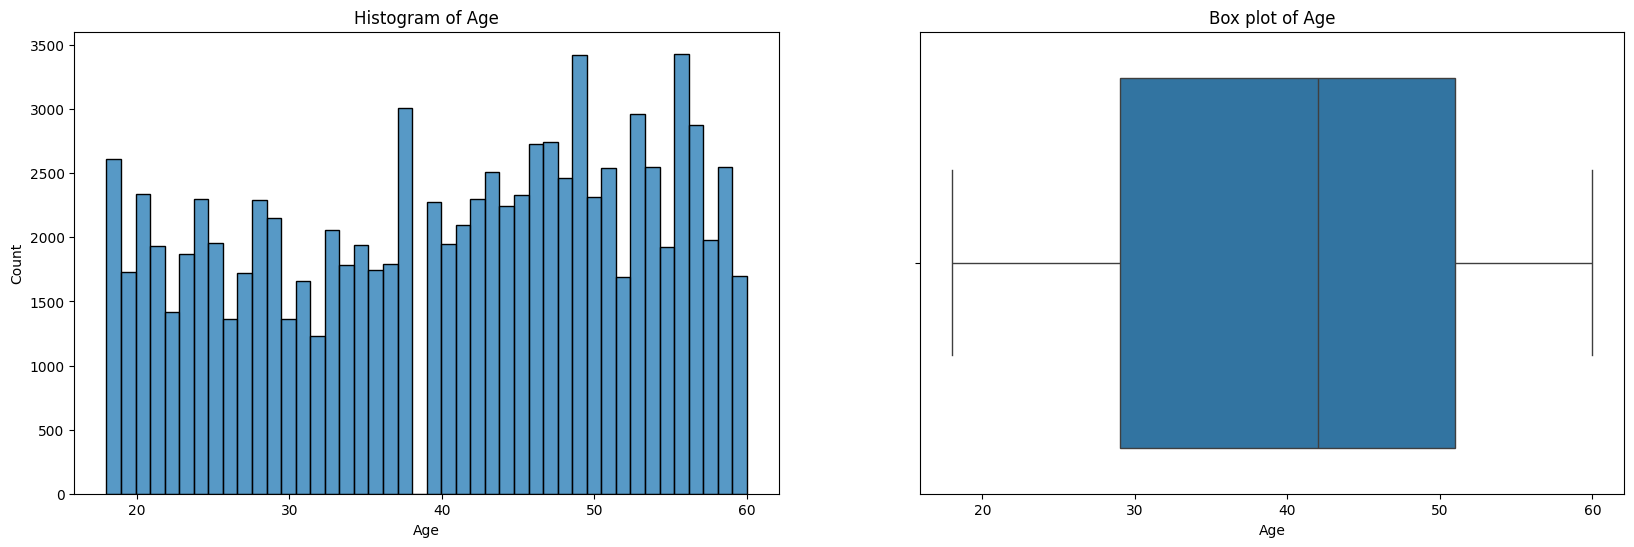

In [18]:
plot_numerical(data, 'Age')

#### Insights:
- **Histogram:**
    - The age distribution in the test set appears fairly consistent, with relatively uniform counts across different age groups
    - Ages span from around 18 to 60, without any single age group dominating the dataset, which suggests a broad age range and diversity
    - Peaks are visible around the ages of 20 and 50, similar to the training set, indicating these age groups might be more represented
    - This distribution suggests a good mix of younger and older adults, making the test set comparable to the training set.
- **Box Plot:**
    - The median age is around the early 40s, similar to the training set, indicating that half of the population is below this age and half is above
    - The interquartile range (IQR) falls between approximately 30 and 50 years, indicating that most of the data lies within this age range
    - No outliers are observed beyond the whiskers, indicating a well-contained age range from 18 to 60, similar to the training data

### CGPA

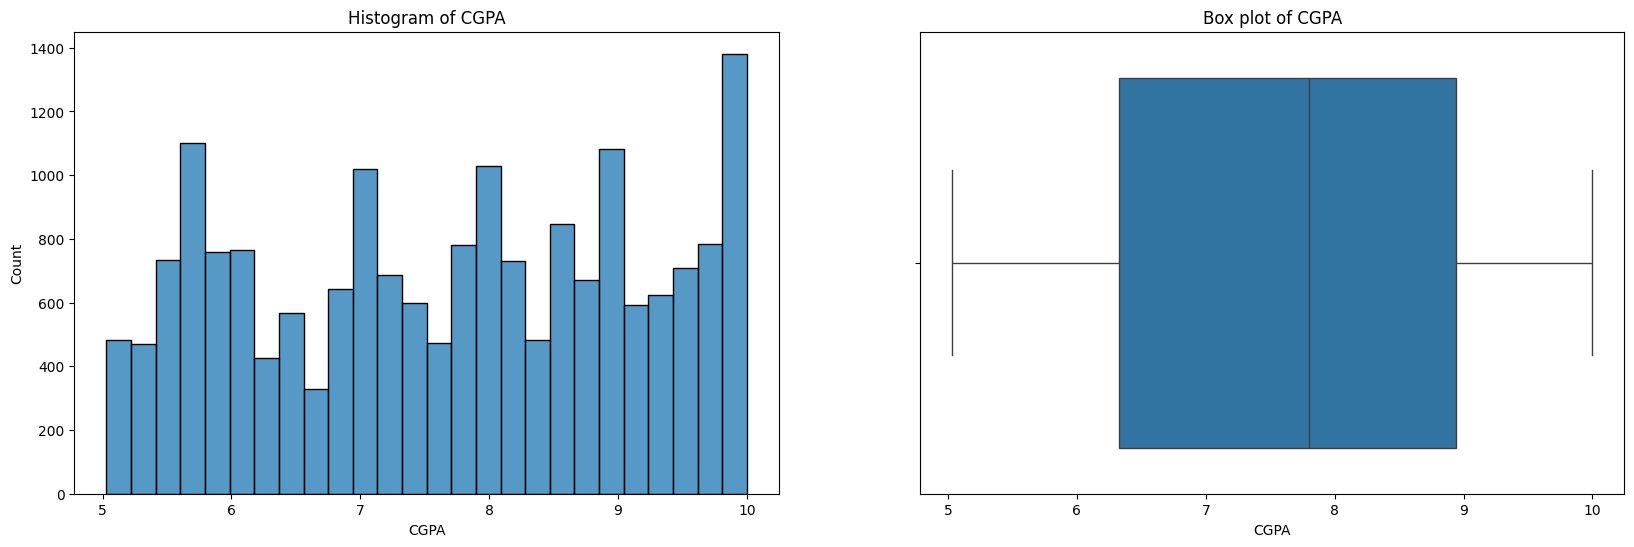

In [19]:
plot_numerical(data, 'CGPA')

#### Insights:
- **Histogram:**
    - The CGPA distribution in the test set spans from 5.0 to 10.0, similar to the training set, showing a wide range of academic performance
    - Peaks are visible around CGPA values of 6.0, 7.0, and 10.0, with the highest frequency at CGPA 10.0. This suggests that, as in the training set, a notable portion of students achieve high scores, possibly due to a grading cap
    - The distribution reflects diverse academic performance levels, with a slightly higher concentration of students at both lower (around 6.0) and upper (around 10.0) ends
- **Box Plot:**
    - The median CGPA is around 7.8, consistent with the training set, suggesting that half of the students score below and half score above this point
    - The interquartile range (IQR) covers approximately 6.3 to 8.9, indicating that the middle 50% of CGPA scores fall within this range
    - The distribution has well-contained whiskers, with CGPA values spanning from about 5.0 to 10.0, and no apparent outliers, as seen in the training dataset

### Gender

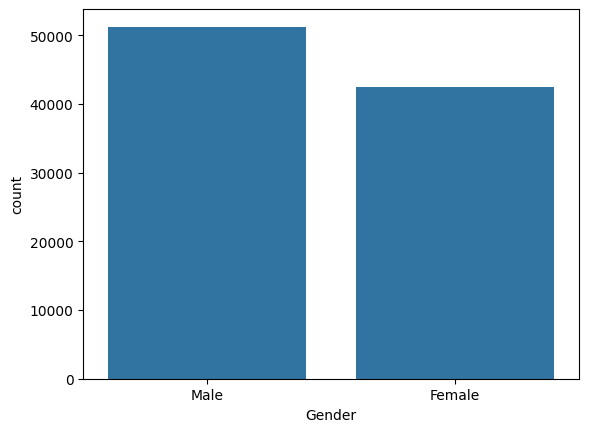

<Figure size 1000x600 with 0 Axes>

In [21]:
plot_categorical(data, 'Gender')

#### Insights:
- The Gender attribute in the test set has two categories: Male and Female
- Males are slightly more frequent than females, with a noticeable but not extreme imbalance, similar to the training set. This indicates that the test set also has a higher representation of males

### City

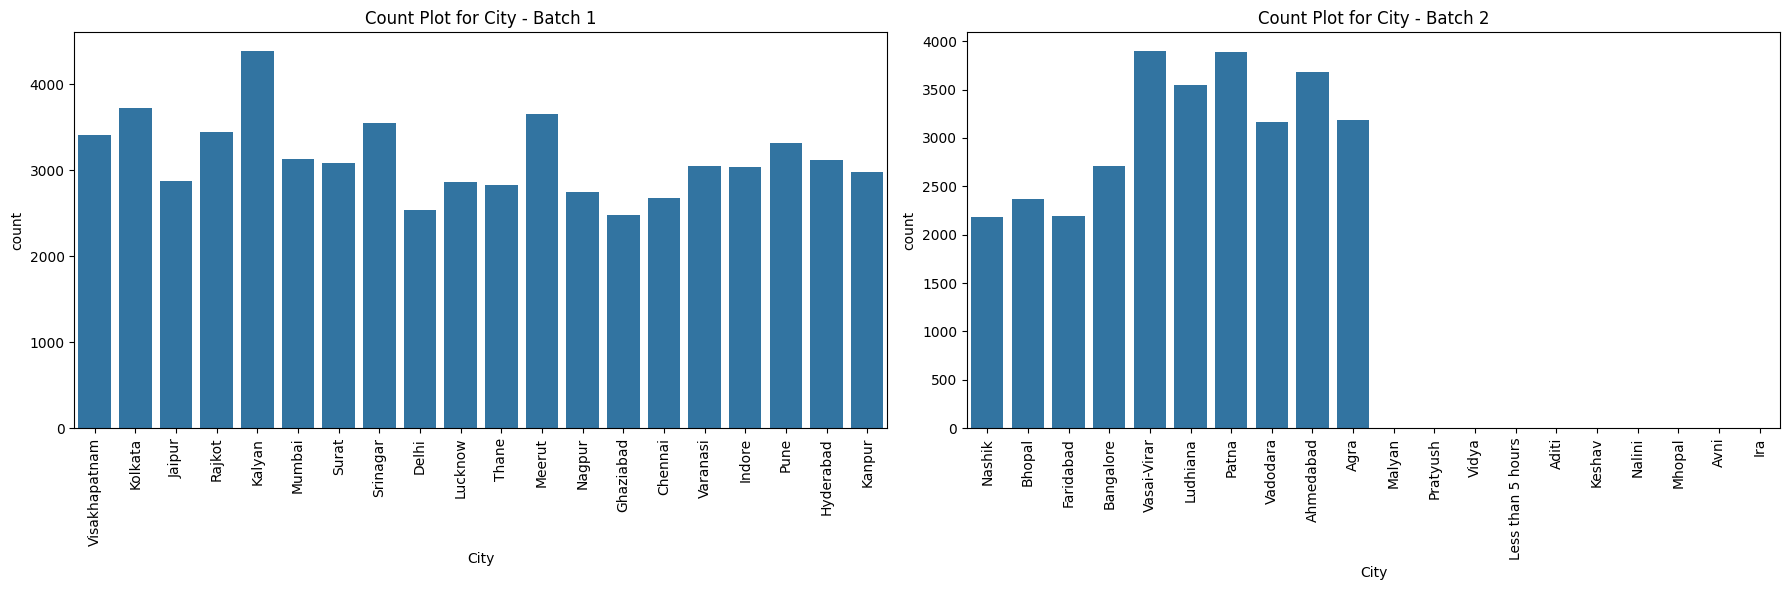

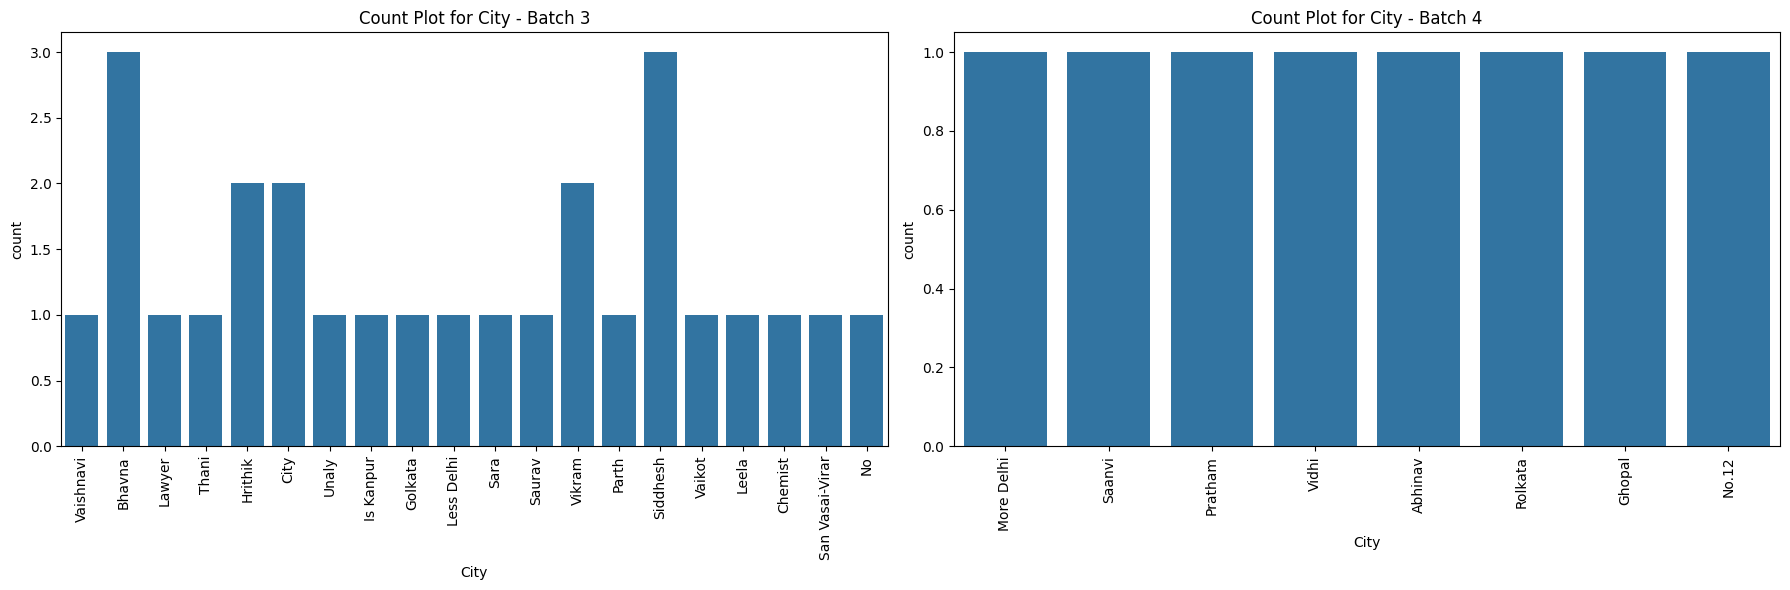

In [22]:
plot_categorical(data, 'City')

#### Insights:
- Similar to the training set, the test set shows a concentration of high representation in major cities while smaller cities or unusual entries have minimal counts. This indicates an urban-centric dataset but with inconsistencies in labeling
- The presence of non-city entries in Batches 3 and 4, such as individual names or ambiguous terms, suggests potential data quality issues in the City attribute

### Working Professional or Student

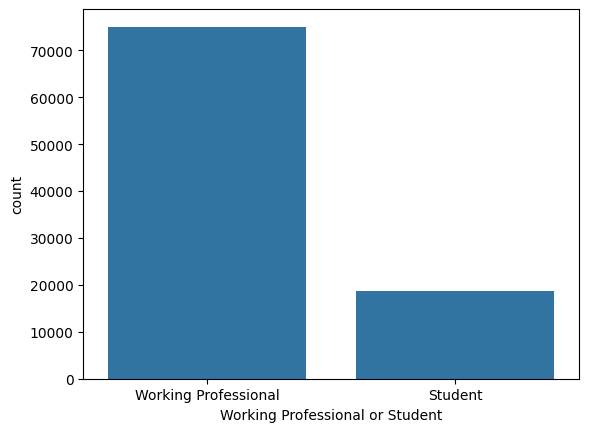

<Figure size 1000x600 with 0 Axes>

In [24]:
plot_categorical(data, 'Working Professional or Student')

### Insights:
- The Working Professional or Student attribute in the test set has two categories: Working Professional and Student
- Working Professionals are the majority, with a count significantly higher than that of Students. The count for working professionals is over 70,000, while students represent a much smaller portion, likely around 20,000
- This distribution is similar to the training set, maintaining a composition of approximately 80% working professionals and 20% students

### Study Satisfaction

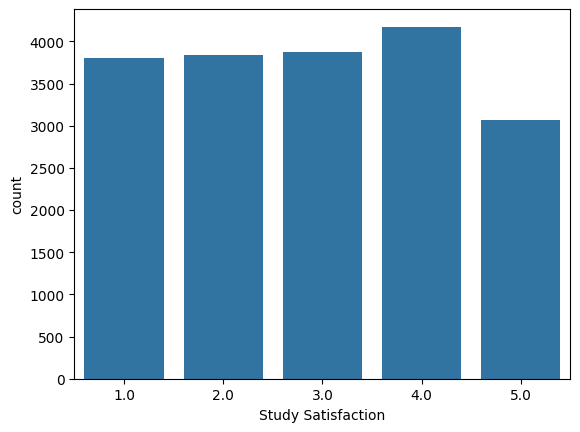

<Figure size 1000x600 with 0 Axes>

In [25]:
plot_categorical(data, 'Study Satisfaction')

#### Insights:
- The Study Satisfaction attribute includes five levels, ranging from 1 (lowest) to 5 (highest)
- Satisfaction levels 2, 3, and 4 have similar frequencies, each around 4,000, indicating that a substantial portion of students report moderate satisfaction with their studies
- Level 5 has the lowest count, showing that fewer students report the highest level of study satisfaction
- Level 1 also has a slightly lower count compared to the middle levels, suggesting fewer students experience extreme dissatisfaction.

### Job Satisfaction

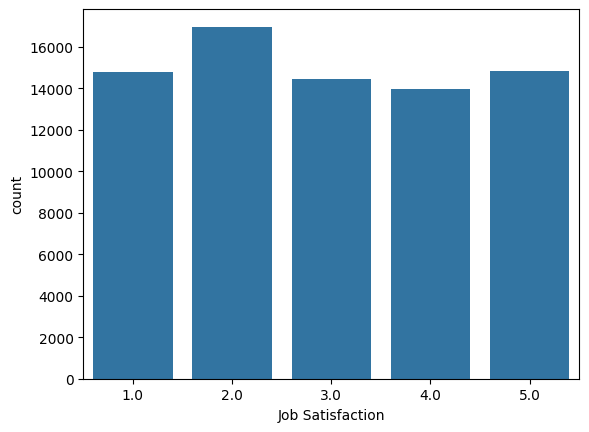

<Figure size 1000x600 with 0 Axes>

In [26]:
plot_categorical(data, 'Job Satisfaction')

#### Insights:
- The Job Satisfaction attribute in the test set includes five levels, from 1 (lowest) to 5 (highest)
- Level 2 has the highest count, around 16,000 entries, suggesting that a notable portion of individuals report relatively low job satisfaction
- Levels 1, 3, 4, and 5 have relatively balanced counts, each with around 14,000 to 15,000 entries, showing a fairly even distribution across these satisfaction levels.

### Academic Pressure

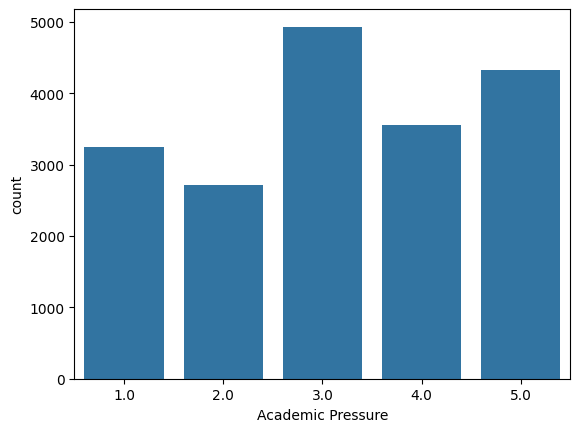

<Figure size 1000x600 with 0 Axes>

In [27]:
plot_categorical(data, 'Academic Pressure')

#### Insights:
- The Academic Pressure attribute includes five levels, from 1 (low pressure) to 5 (high pressure)
- Level 3 has the highest count, with approximately 5,000 entries, indicating that moderate academic pressure is the most common experience among students in the test set
- Levels 1, 4, and 5 have similar counts, each around 3,000 to 4,000, indicating a balanced spread across low to high academic pressure
- Level 2 has the lowest count, similar to the training set, suggesting that slightly low academic pressure is less common

### Work Pressure

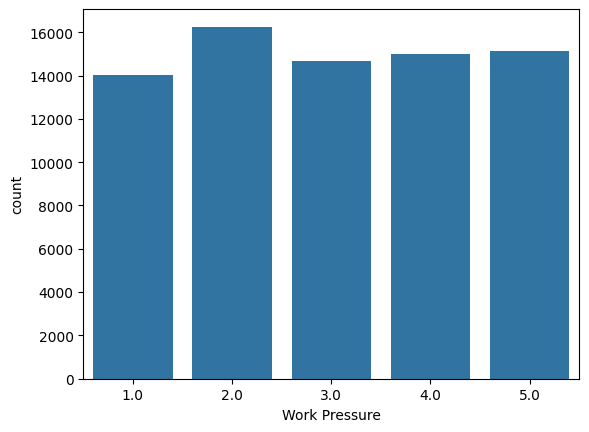

<Figure size 1000x600 with 0 Axes>

In [28]:
plot_categorical(data, 'Work Pressure')

#### Insights:
- The Work Pressure attribute in the test set includes five levels, from 1 (low pressure) to 5 (high pressure)
- Level 2 has the highest count, close to 16,000 entries, indicating that moderate work pressure is a common experience among individuals in the test set
- The other levels (1, 3, 4, and 5) each have counts between 14,000 and 15,000, showing a fairly balanced distribution across different levels of work pressure

### Profession

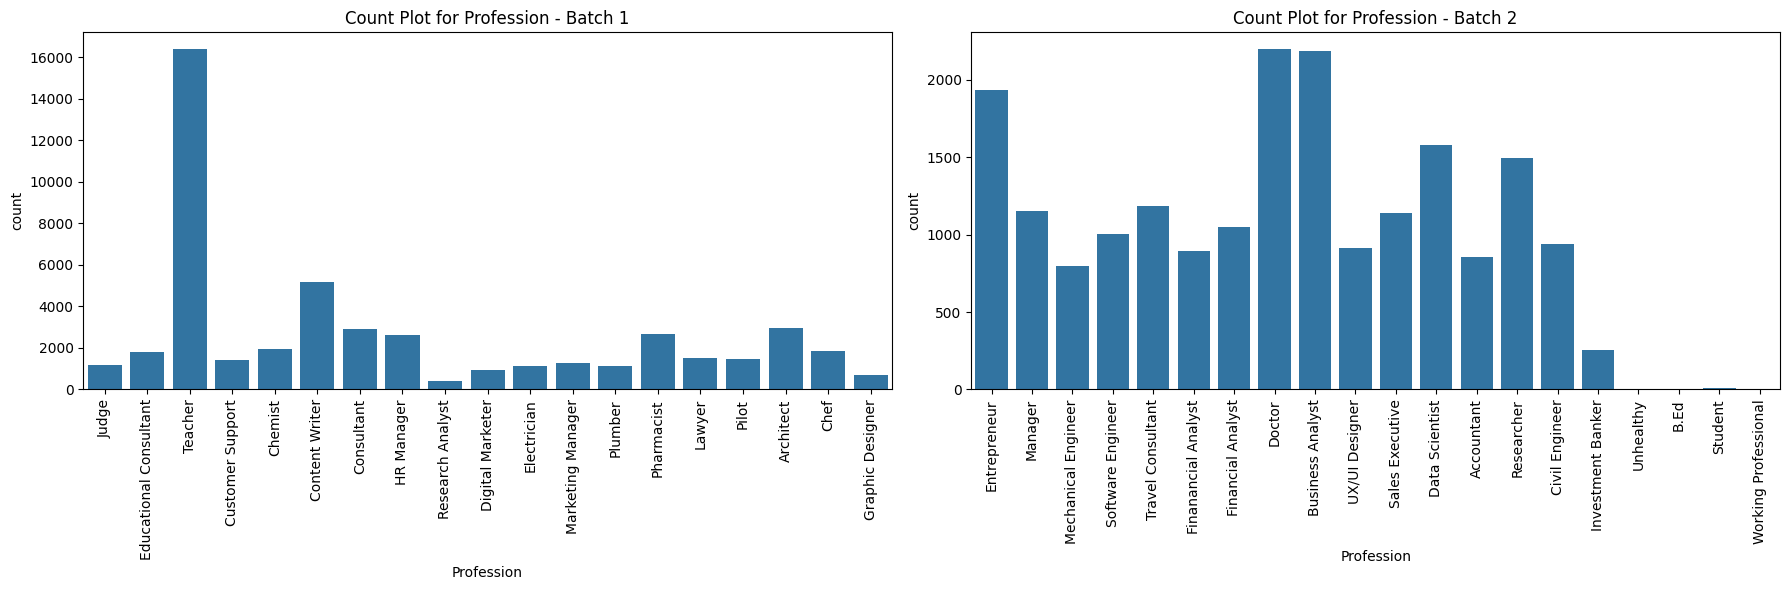

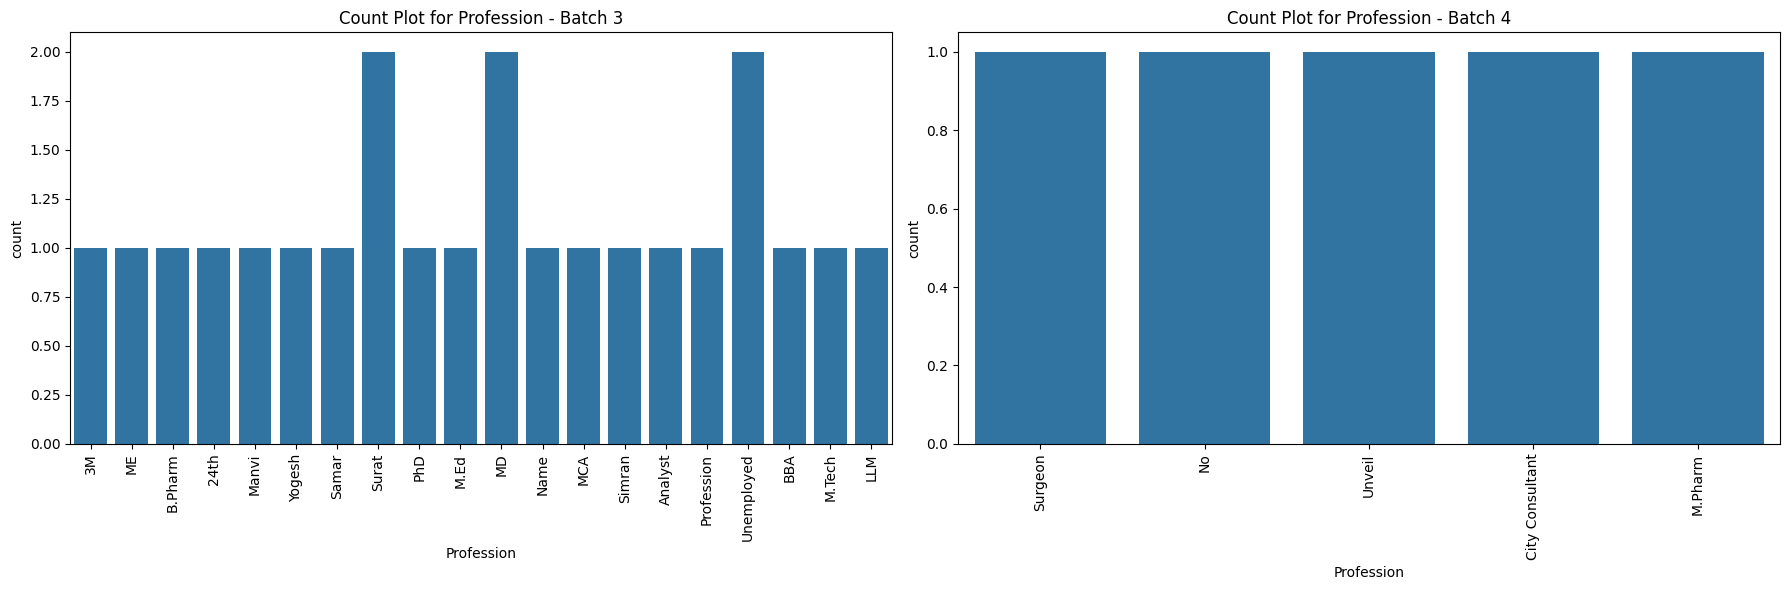

In [29]:
plot_categorical(data, 'Profession')

#### Insights:
- The test set, like the training set, shows a significant imbalance with some professions, particularly Teachers and Doctors, being heavily represented, while others have minimal or inconsistent entries
- The presence of non-professional entries, such as names, degrees, or ambiguous terms (e.g., Unwell, 24th), suggests inconsistencies in the Profession attribute
- Despite data inconsistencies, the test set includes a broad array of professional fields, covering education, healthcare, corporate, technical, and support roles

### Sleep Duration

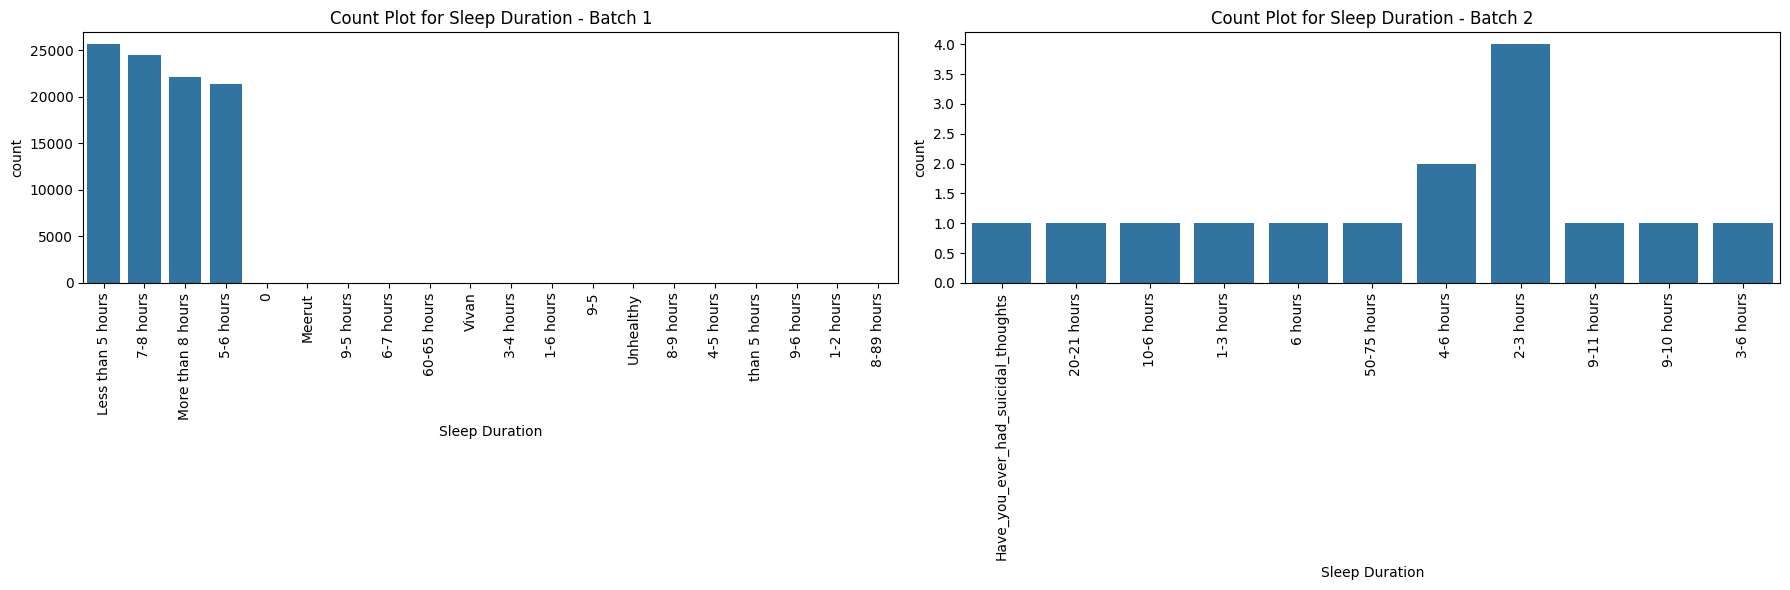

In [31]:
plot_categorical(data, 'Sleep Duration')

#### Insights:
- As in the training set, there is a trend toward shorter sleep durations in the test set, with most individuals reporting less than 5 hours of sleep
- The presence of entries that do not correspond to valid sleep durations (e.g., city names, unrelated questions) suggests data quality issues that need to be addressed

### Dietary Habits

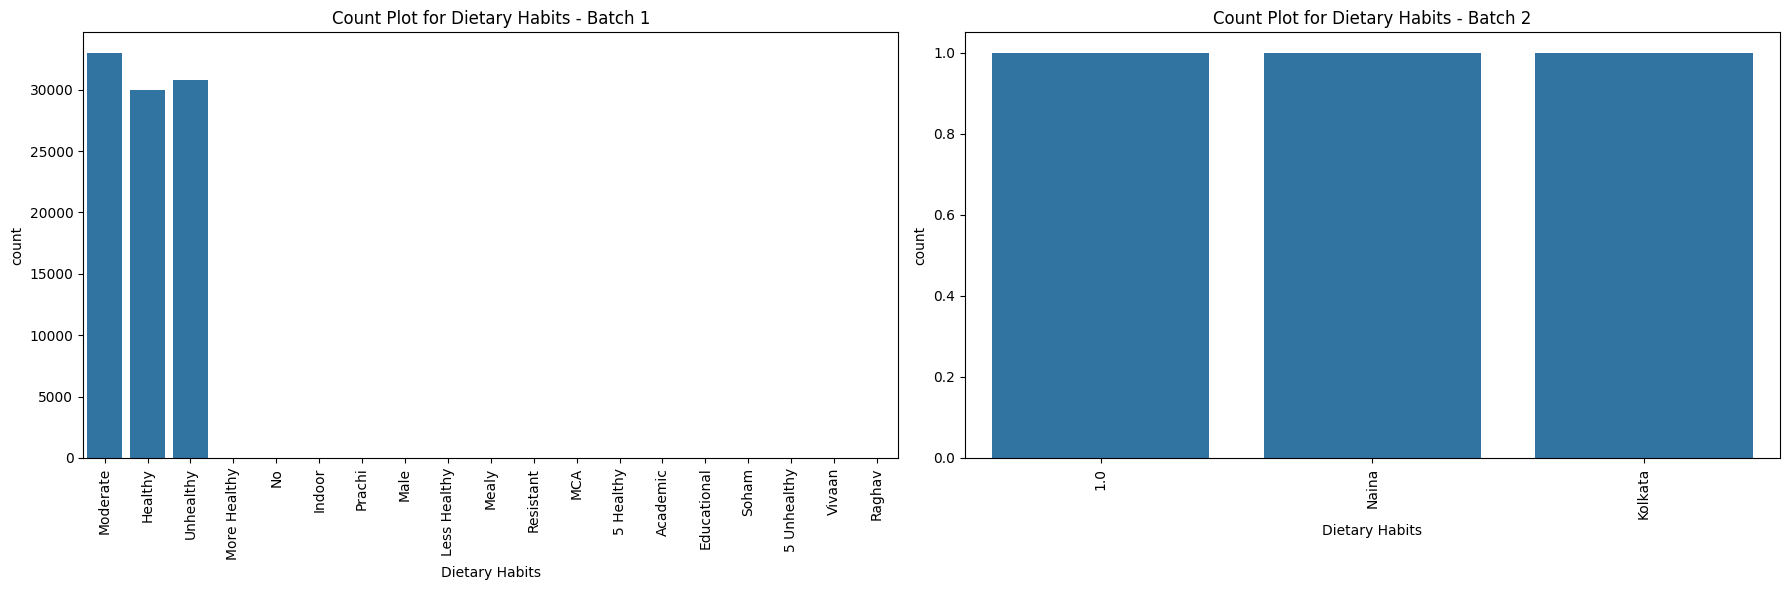

In [32]:
plot_categorical(data, 'Dietary Habits')

#### Insights:
- Similar to the training set, Healthy, Unhealthy, and Moderate are the main dietary categories, suggesting these are accurately representative of the dietary habits in the sample population
- The inclusion of non-dietary-related entries indicates potential data entry errors

### Degree

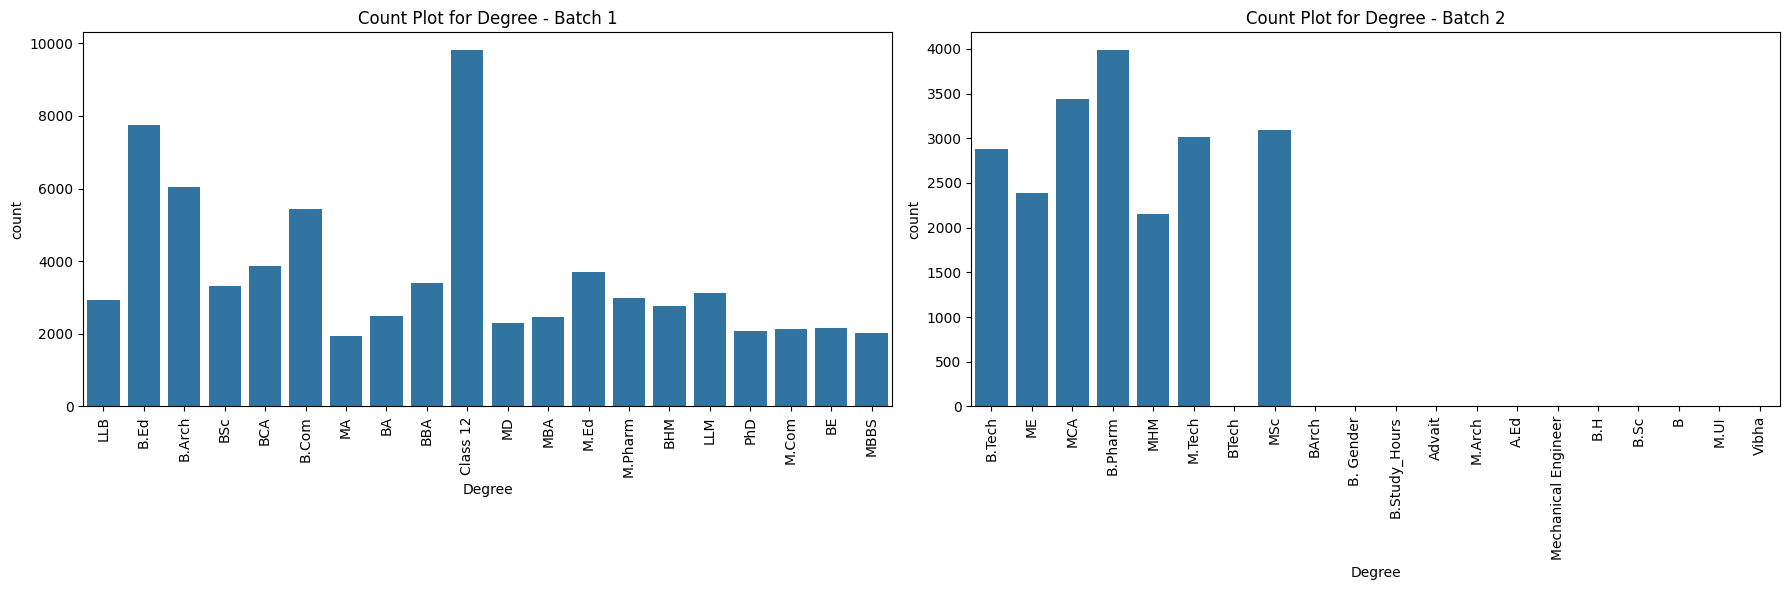

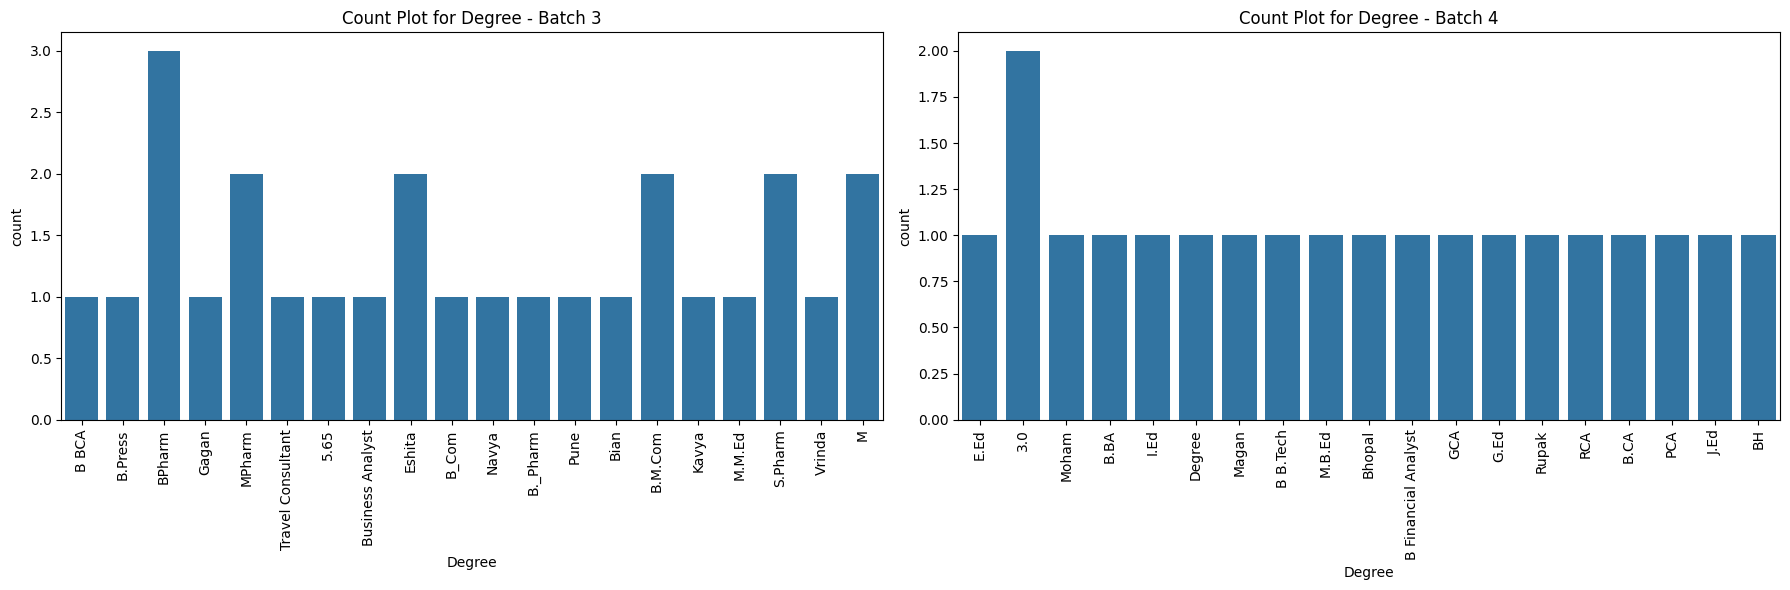

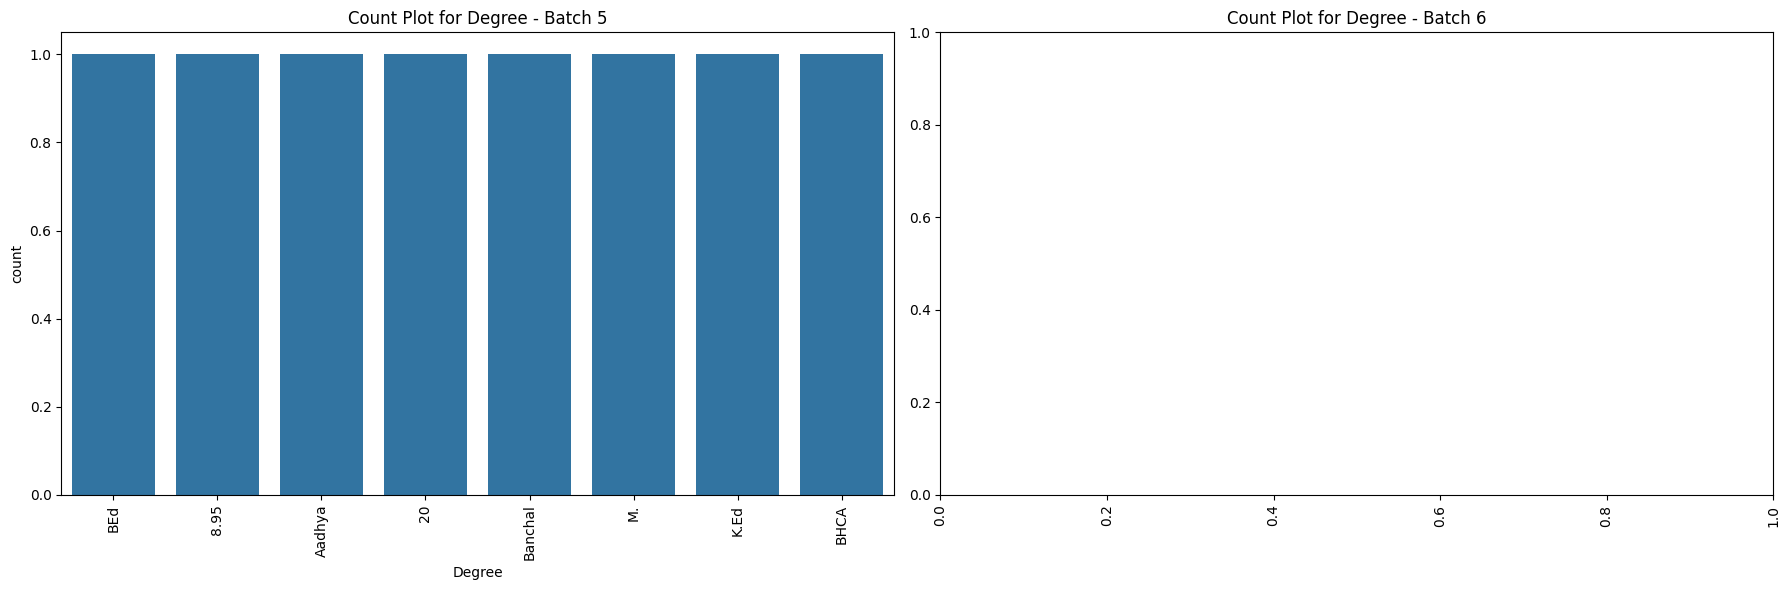

In [33]:
plot_categorical(data, 'Degree')

#### Insights:
- Common degrees like Class 12, B.Ed, B.Com, BCA, and M.ed dominate the data, representing typical undergraduate and advanced degrees
- There are multiple non-degree entries and inconsistencies in Batches 3 through 5, this suggests potential data entry errors
- The data reflects a wide array of educational backgrounds, especially in the first two batches, while the later batches appear to be more fragmented and less focused

### Financial Stress

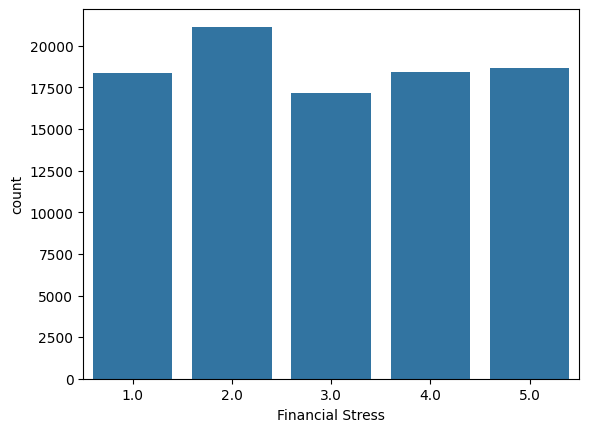

<Figure size 1000x600 with 0 Axes>

In [34]:
plot_categorical(data, 'Financial Stress')

#### Insights:
- Level 2 has the highest count, indicating that mild financial stress is the most reported level among test set respondents, similar to what was observed in the training set
- Levels 1, 3, 4, and 5 have slightly lower counts but are still relatively close to one another, indicating a balanced spread across different stress levels
- The distribution remains fairly balanced across the levels, suggesting that financial stress is a common experience, with respondents reporting a range of intensities

### Had Suicidal Thoughts?

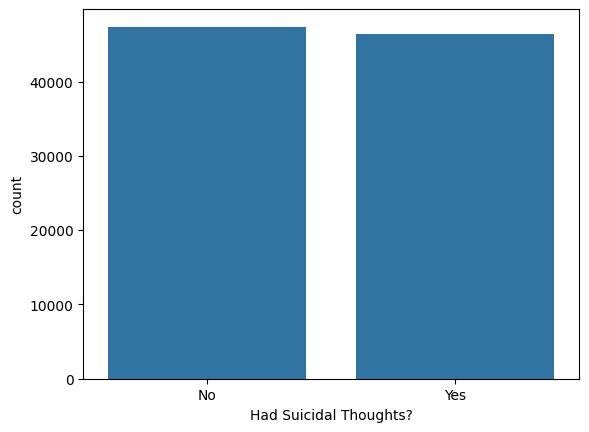

<Figure size 1000x600 with 0 Axes>

In [35]:
plot_categorical(data, 'Had Suicidal Thoughts?')

#### Insights:
- Similar to the training set, the test set has a balanced representation between "Yes" and "No" responses
- The balanced distribution in both the training and test sets supports the reliability of the dataset

### Family History of Mental Illness

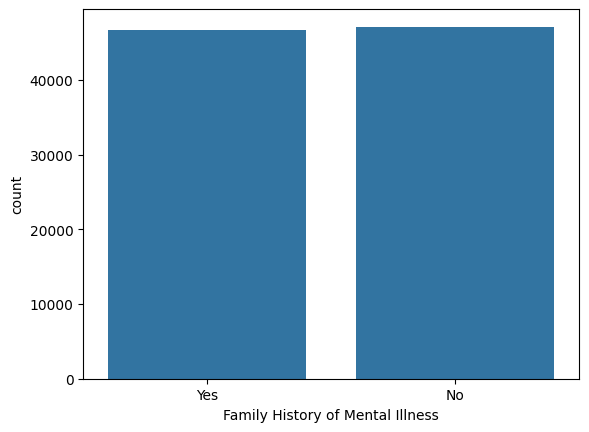

<Figure size 1000x600 with 0 Axes>

In [37]:
plot_categorical(data, 'Family History of Mental Illness')

#### Insights:
- Similar to the training set, there is a balanced representation in the test set, allowing for consistent comparative analysis

## Bivariate Analysis

### Age vs. CGPA

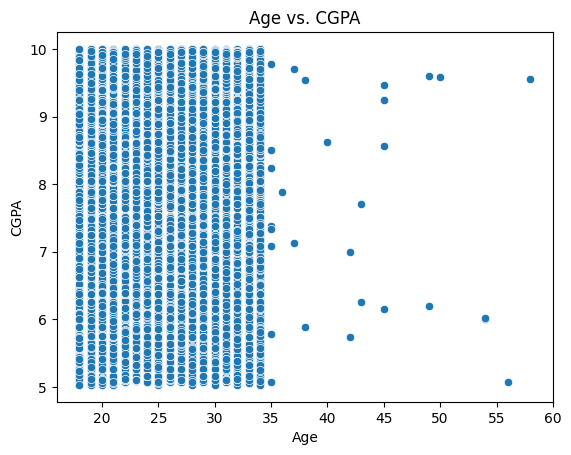

In [39]:
plot_numerical_vs_numerical(data, 'Age', 'CGPA')

#### Insights:
- Most data points are concentrated in the younger age range (around 20-30 years), with CGPA values spanning a wide range from approximately 5.0 to 10.0. This concentration reflects a typical student population or individuals close to an academic environment
- Beyond 34 years, the data points become sparse, indicating fewer individuals reporting CGPA at older ages, likely due to fewer people in academia as they age
- In the younger age range, CGPA values again exhibit significant variability, indicating different levels of academic performance within this group
- The plot does not show a clear correlation between age and CGPA, suggesting that age may not significantly impact CGPA in this dataset
- A few older individuals (ages 35-60) show CGPA values, which may be outliers. These cases could represent non-traditional students or returning professionals

### Age vs. Gender

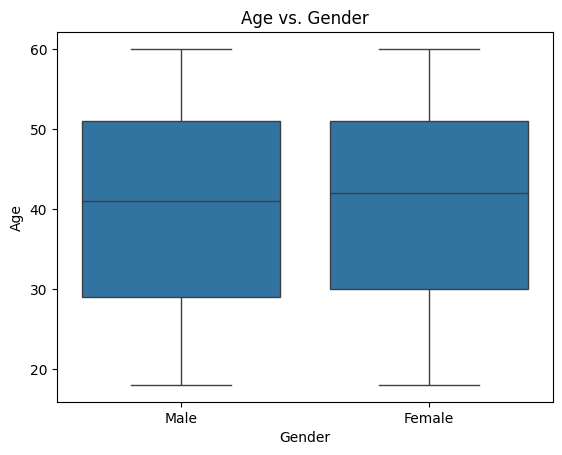

In [40]:
plot_numerical_vs_categorical(data, 'Age', 'Gender')

#### Insights:
- Both male and female groups have a similar age distribution. The median age for both genders is approximately the same, indicating no significant difference in central age tendency between males and female
- The interquartile range (IQR) and overall range of ages for both genders are comparable. The lower whisker extends to around age 18, and the upper whisker reaches about age 60, similar to the training set
- The test set's age distribution for both genders aligns with the training set, suggesting consistency in age representation across both datasets

#### Age vs. City

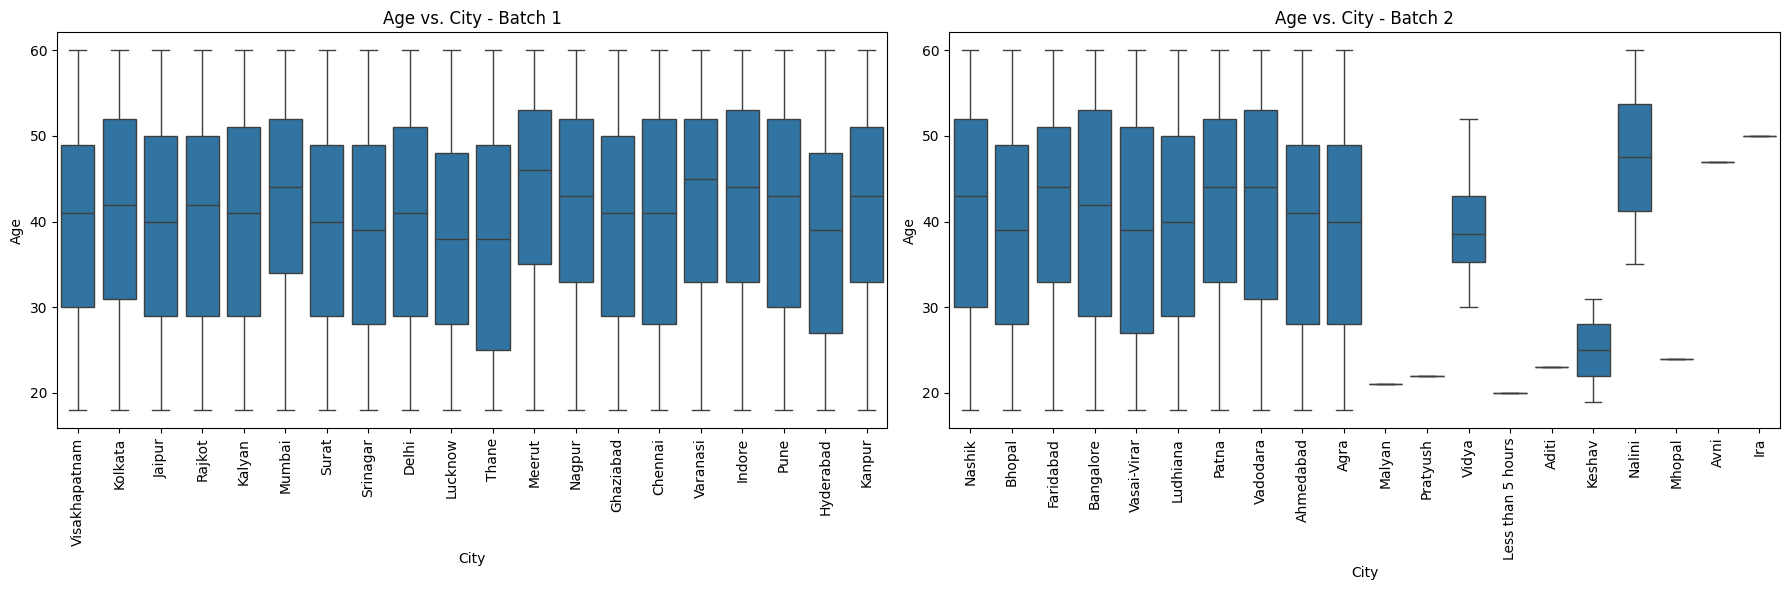

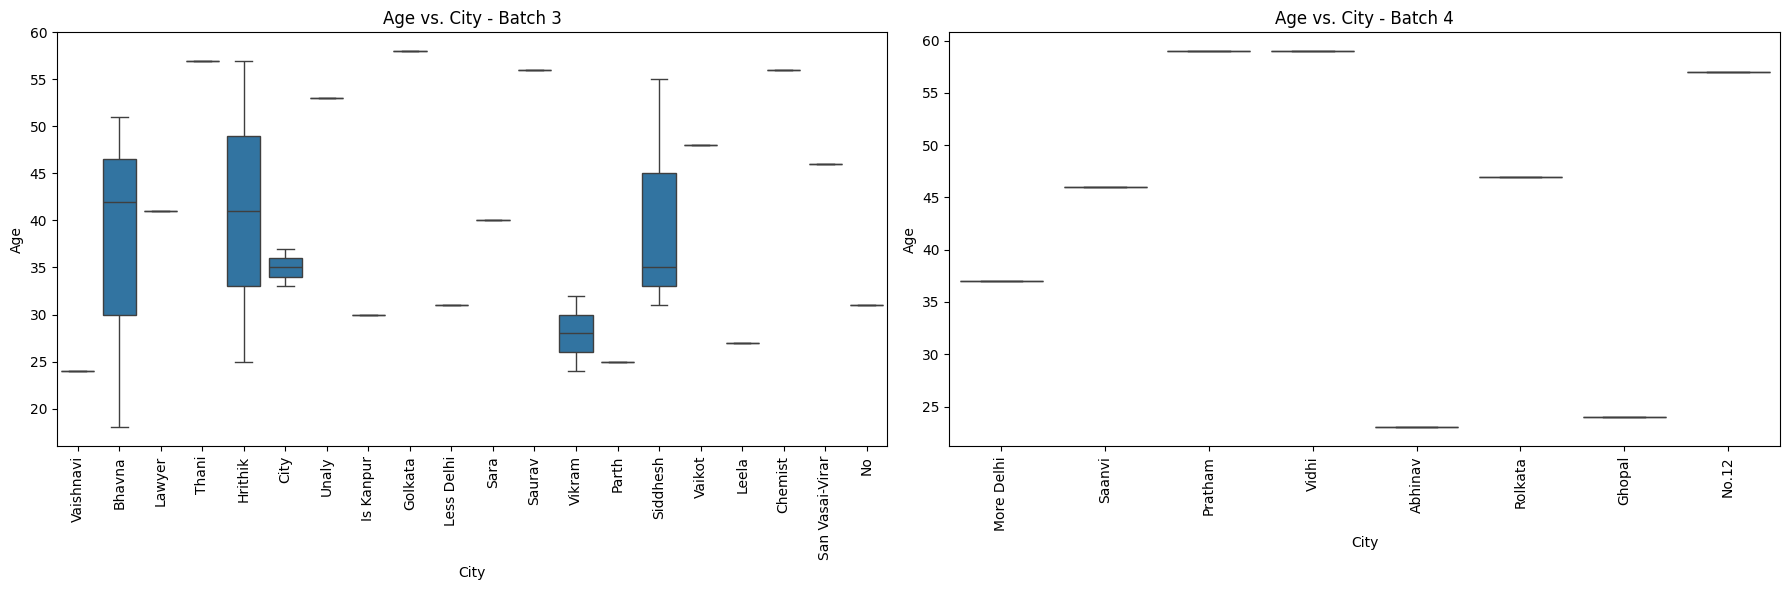

In [41]:
plot_numerical_vs_categorical(data, 'Age', 'City')

#### Insights:
- Cities like Kolkata, Mumbai, Delhi, and Hyderabad show a wide age range, with individuals spanning from their early 20s to 50s. This suggests a diverse population in terms of age within these urban centers
- Some cities, particularly smaller or less populated locations, exhibit narrower age ranges, indicating a more homogenous age group within these areas
- The median age is relatively consistent across most cities but slightly higher in some locations, indicating that some cities may have an older working or student population
- Certain labels that do not represent typical city names (e.g., names of individuals) are also present, which may indicate data quality issues or misclassifications within the City variable.

### Age vs. Working Professional or Student

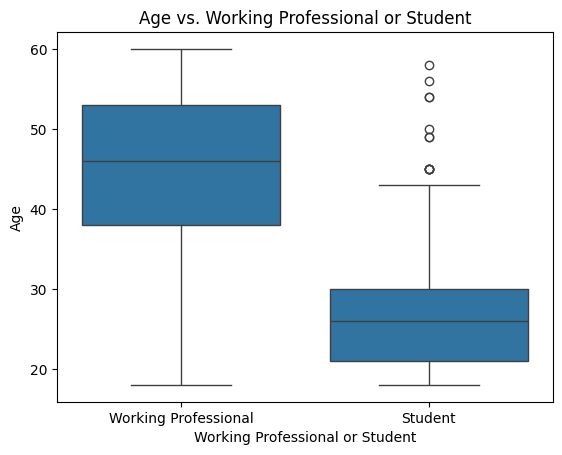

In [42]:
plot_numerical_vs_categorical(data, 'Age', 'Working Professional or Student')

#### Insights:
- Similar to the training set, working professionals have a broader age range compared to students. The age of working professionals spans from the early 20s to around 60, while students are primarily in their 20s, with some outliers reaching into the 40s and 50s
- The median age of working professionals is notably higher than that of students. This reflects the expected demographic distribution, with professionals generally being older than students
- There are a few age outliers among students, suggesting some older individuals are still classified as students. This could represent non-traditional students or those who have returned to education later in life
- The distribution in the test set appears consistent with the training set, with similar patterns in age range and median age difference between working professionals and students. This indicates that both sets capture a similar demographic pattern for this variable

### Age vs. Study Satisfaction

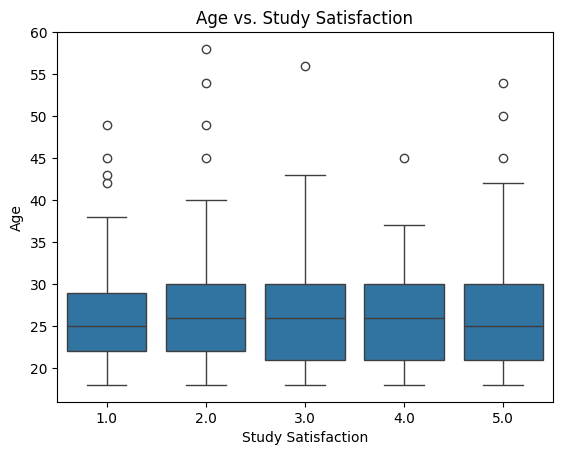

In [43]:
plot_numerical_vs_categorical(data, 'Age', 'Study Satisfaction')

#### Insights:
- The age range for all levels of study satisfaction is quite consistent, spanning from early 20s to mid-40s, with a median age around the mid-20s for each satisfaction level
- This consistency suggests that study satisfaction does not vary widely with age in the test set
- There are several outliers, particularly with higher ages, across each satisfaction level. These outliers, generally older than the main age range, indicate that some individuals outside the typical age range for students still exhibit a range of satisfaction with their studies
- The presence of these older participants in each category suggests that age does not strongly influence study satisfaction
- The distribution in the test set is similar to the training set, with a comparable spread and median age across satisfaction levels. This suggests a uniform pattern in both sets
- There is no clear trend between age and study satisfaction, as the distributions are similar across all satisfaction levels
- This implies that study satisfaction levels are fairly independent of age.

### Age vs. Job Satisfaction

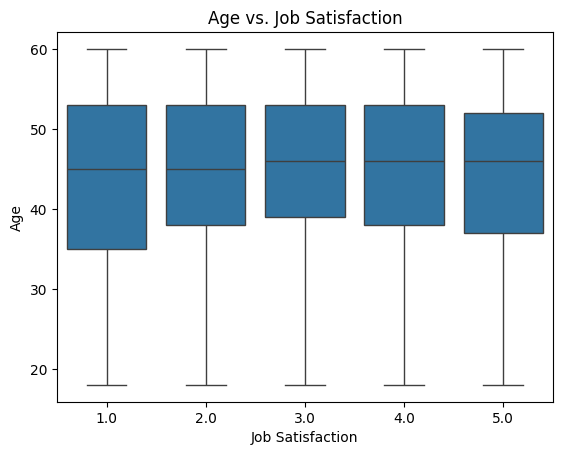

In [44]:
plot_numerical_vs_categorical(data, 'Age', 'Job Satisfaction')

#### Insights:
- Similar to the training set's observations, the age distribution remains quite consistent across all levels of job satisfaction (1 through 5)
- Median ages for each satisfaction level hover around the mid-40s, suggesting that age does not have a noticeable impact on job satisfaction levels
- The interquartile range and age spread from early 20s to late 50s are consistent across satisfaction levels, indicating that people in a wide age range share similar levels of job satisfaction
- The test set distribution closely matches that of the training set, reinforcing that job satisfaction is likely independent of age
- This consistency across both sets suggests robustness in the finding that age does not correlate strongly with job satisfaction in this dataset

### Age vs. Academic Pressure

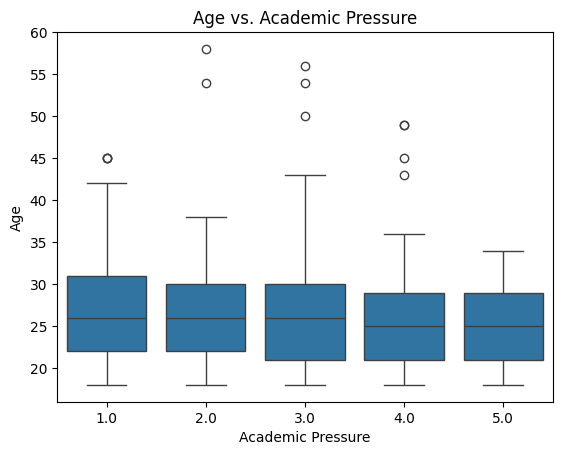

In [45]:
plot_numerical_vs_categorical(data, 'Age', 'Academic Pressure')

#### Insights:
- The median ages are stable across academic pressure levels from 1 to 5, typically centered in the mid to late-20s
- The distribution does not vary significantly across pressure levels, indicating no clear age-based trend in experiencing academic pressure
- The interquartile range (IQR) is similar for all levels, covering ages from approximately early 20s to early-30s
- Some outliers are present at higher ages (40+), but these do not heavily influence the central tendency
- Similar to the training set, academic pressure appears to be independent of age in the test set as well

### Age vs. Work Pressure

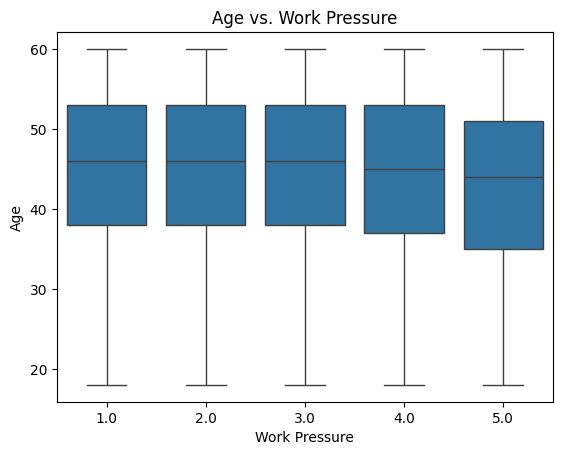

In [46]:
plot_numerical_vs_categorical(data, 'Age', 'Work Pressure')

#### Insights:
- The median age remains quite steady across all work pressure levels (1 to 5), with medians generally centered around the early-to-mid 40s
- This lack of variation in median age across different work pressure levels suggests that age does not significantly impact the level of work pressure experienced
- The interquartile ranges (IQR) across all work pressure levels are fairly consistent, generally covering an age range from about 30 to 50
- The whiskers span from approximately 20 to 60 years of age, indicating a broad distribution across all ages for each work pressure level
- There is no observable trend linking age to work pressure, suggesting that work pressure is not particularly age-dependent in this dataset
- The patterns in the test set closely mirror those in the training set, reinforcing the finding that work pressure is uniformly distributed across age groups

### Age vs. Work/Study Hours

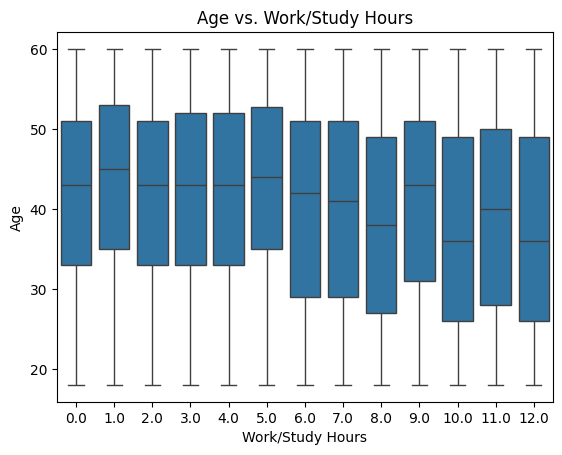

In [47]:
plot_numerical_vs_categorical(data, 'Age', 'Work/Study Hours')

#### Insights:
- Similar to the training set, the median age remains relatively stable across various work/study hour categories, hovering around the mid-40s. This stability indicates that age does not significantly influence the amount of work/study hours
- The interquartile ranges (IQRs) across different work/study hours are consistent, generally spanning from approximately 30 to 50 years
- This suggests that individuals within this age group have a similar distribution of work/study hours
- The whiskers on each boxplot extend from around 20 to 60 years, showing that each work/study hour category includes a broad range of ages
- There is no observable trend or pattern suggesting that age correlates with higher or lower work/study hours. This uniform distribution of work/study hours across age groups indicates that factors other than age are likely influencing work/study duration
- The test set findings align closely with those in the training set, reinforcing the conclusion that age has little effect on the distribution of work/study hours

### Age vs. Profession

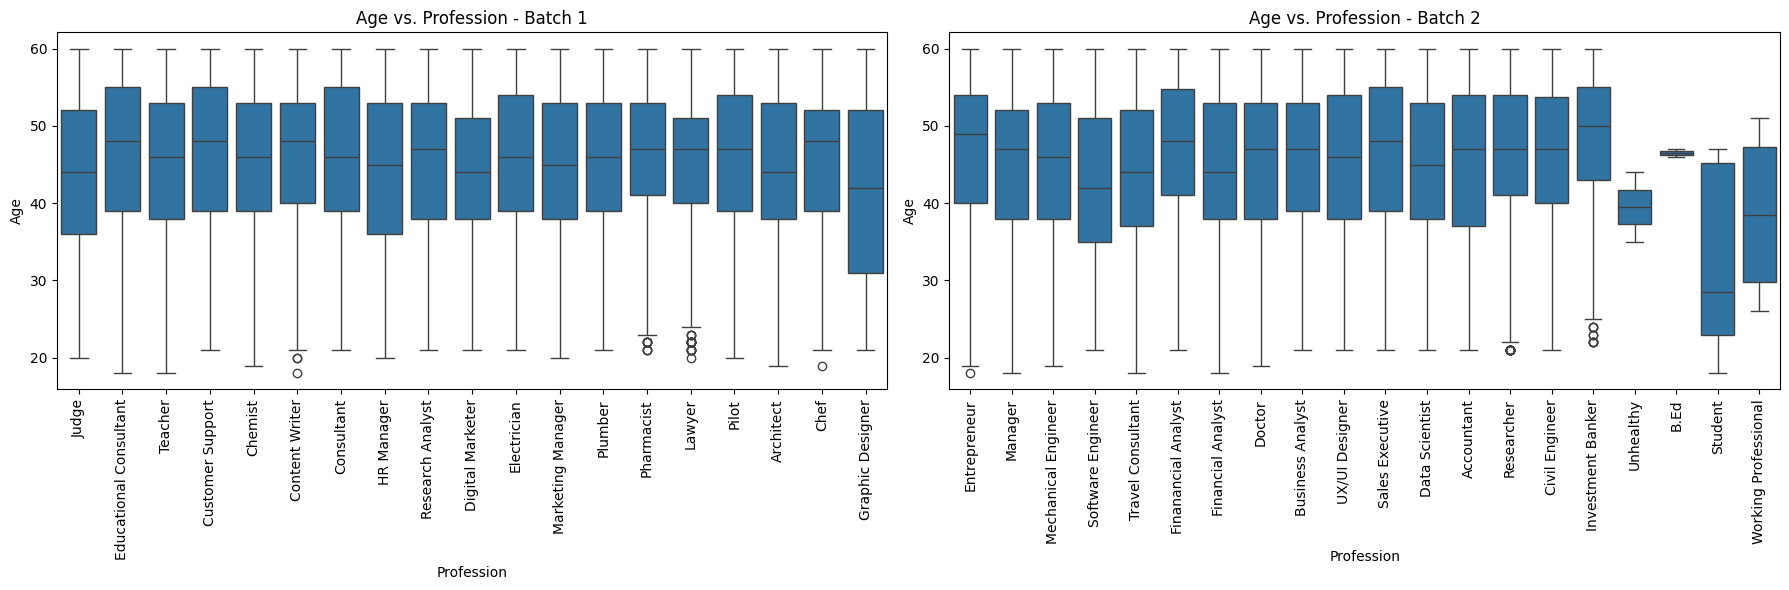

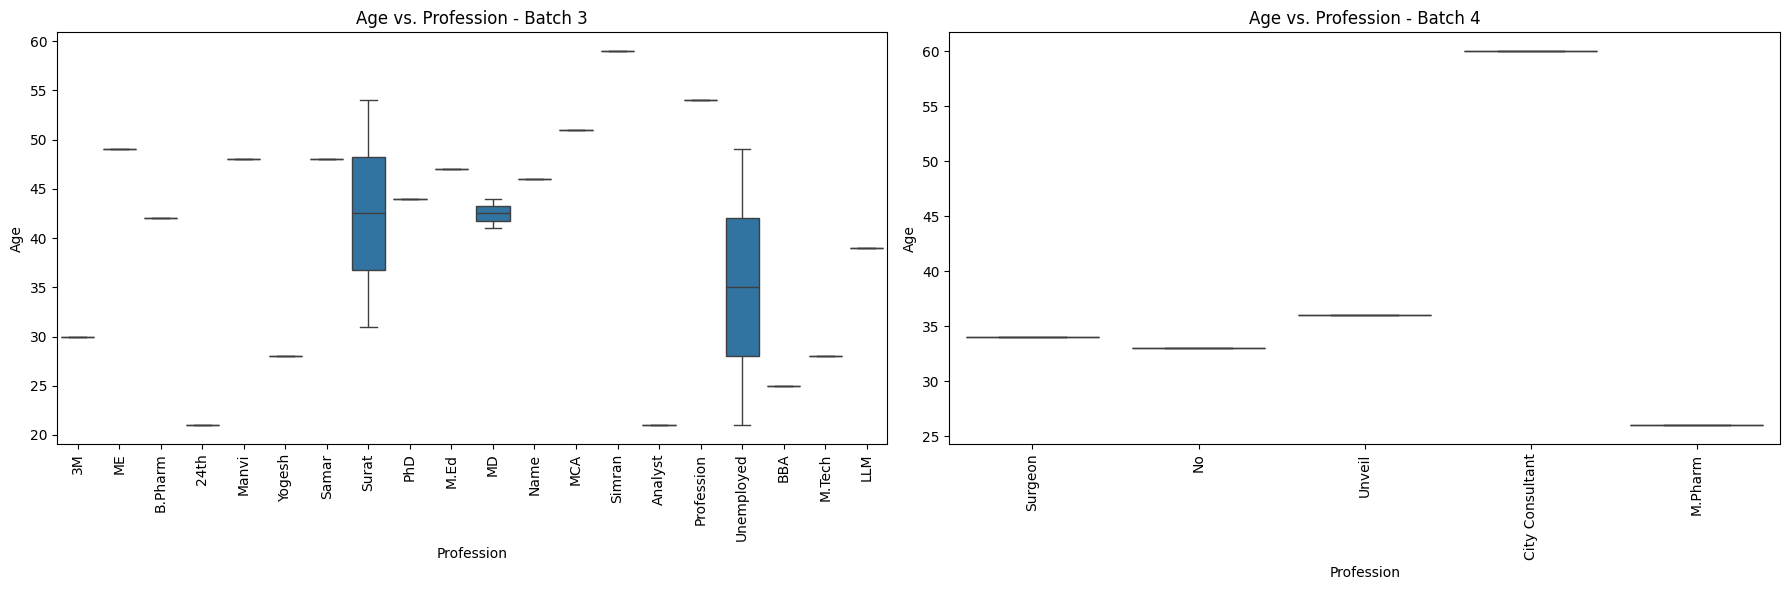

In [48]:
plot_numerical_vs_categorical(data, 'Age', 'Profession')

#### Insights:
- Common professions like Teacher, Customer Support, Software Engineer, and Accountant display a consistent age range across mid-career stages, typically between 30 and 50, with median ages reflecting this stability
- Several professional roles, such as Data Scientist, Financial Analyst, and UX/UI Designer, continue to show diverse age distributions
- This may indicate a mix of career switchers, seasoned professionals, and younger entrants in these fields
- Professions such as Judge, Consultant, and Doctor reflect higher median ages, mostly in the 40s and 50s, consistent with the level of experience typically required for these positions
- There are outliers in various professions, indicating some individuals may either start their careers later or pursue these roles at an atypical age. For example, roles like Pharmacist, Lawyer, and Entrepreneur display a few outliers
- Some roles appear with only a few data points, such as Surgeon and City Consultant, making it harder to draw robust conclusions for these categories. These roles show a narrow age range due to limited representation in the dataset

### Age vs. Sleep Duration

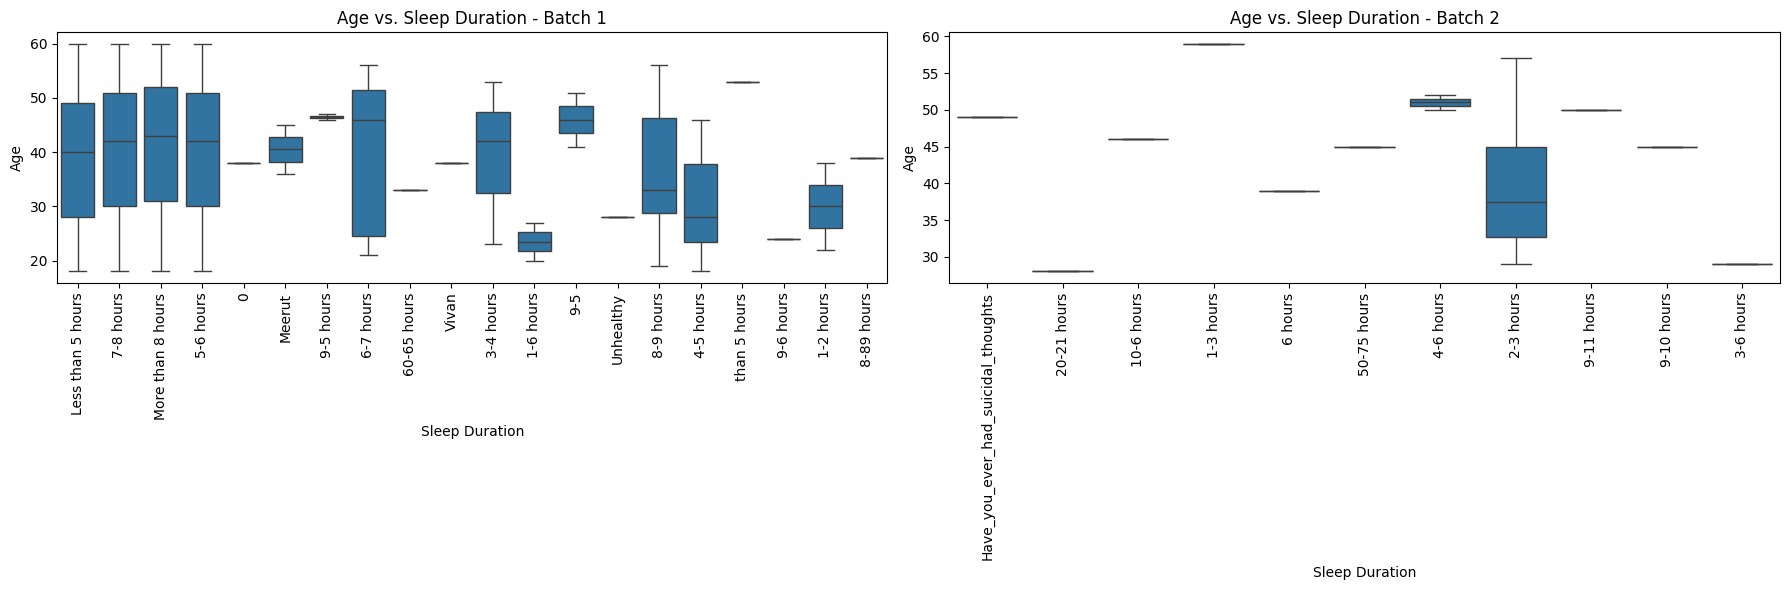

In [49]:
plot_numerical_vs_categorical(data, 'Age', 'Sleep Duration')

#### Insights:
- For standard sleep durations like "Less than 5 hours," "7-8 hours," and "More than 8 hours," the age distributions remain fairly consistent, with median ages clustering around the 40s to 50s
- This reflects a broad age range across these common sleep durations, indicating similar sleep patterns across different age groups
- There are unexpected and possibly erroneous categories such as "Meerut," "Unhealthy," and even phrases like "Have_you_ever_had_suicidal_thoughts," which seem out of place for a sleep duration variable
- Other unusual entries, like "60-65 hours" or "50-75 hours," are extreme values that likely represent data entry errors or outliers
- The IQR for categories like "More than 8 hours" and "7-8 hours" covers a wide range of ages, indicating diverse sleep patterns within these groups
- Shorter sleep durations, such as "2-3 hours," seem to include younger individuals with lower median ages, though some older individuals are present
- The presence of values like "9-5," "Vivaan," and other non-numeric or city-related terms suggests issues with data labeling or categorization

### Age vs. Dietary Habits

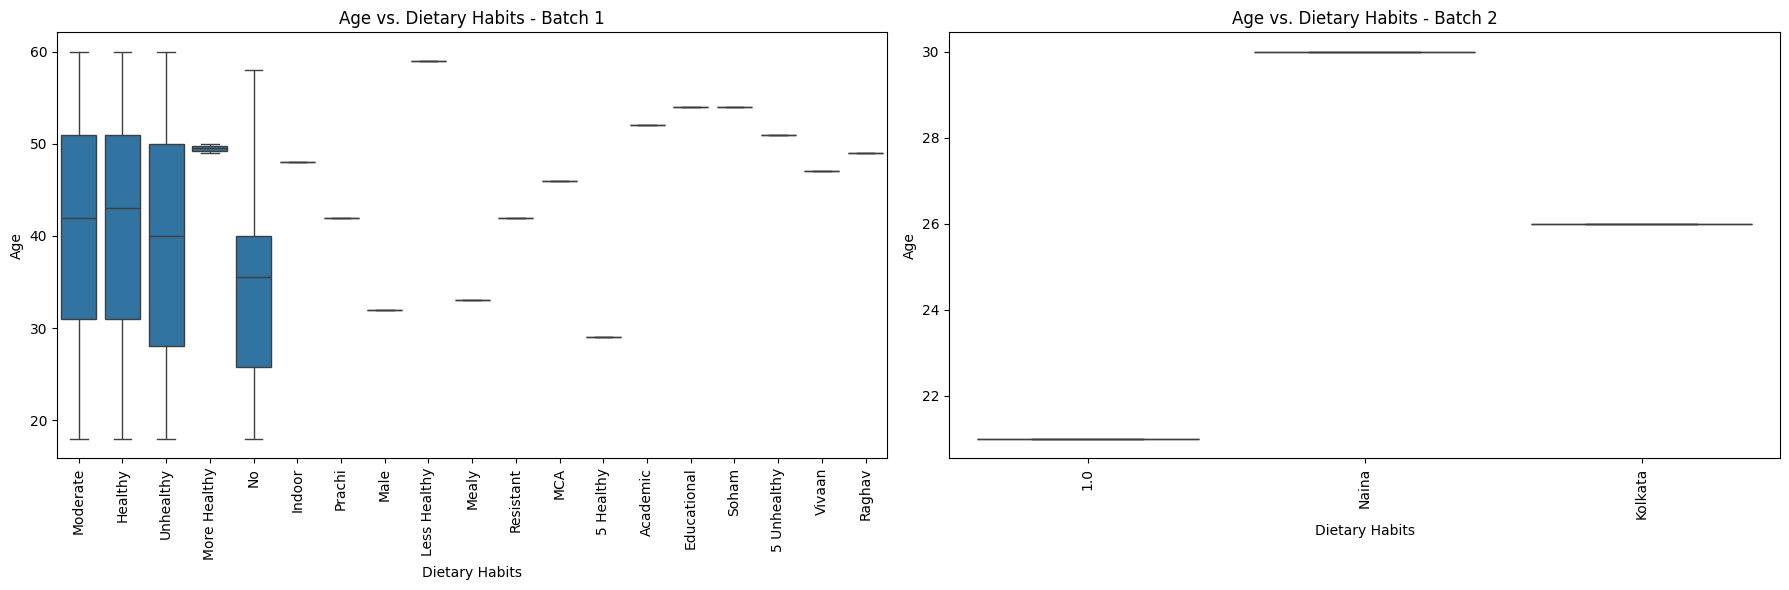

In [50]:
plot_numerical_vs_categorical(data, 'Age', 'Dietary Habits')

#### Insights:
- "Moderate," "Healthy," and "Unhealthy" are the primary dietary categories with the largest representation
- For these categories, the median ages are in the 40s, with a broad distribution that includes various age groups. This shows diversity in age among people with these dietary habits
- There are multiple unrelated entries like "Prachi," "Indoor," "MCA," "Academic," "5 Healthy," and names like "Vivaan" and "Raghav." These do not represent dietary habits and indicate inconsistent data
- The presence of these values suggests a data quality issue, as they introduce noise into the dietary habits attribute
- Similar to the training set, there are significant data entry issues in the test set as well
- Within the valid dietary categories, the age distribution remains consistent, with no significant skewness towards any particular age group for specific dietary preferences

### Age vs. Degree

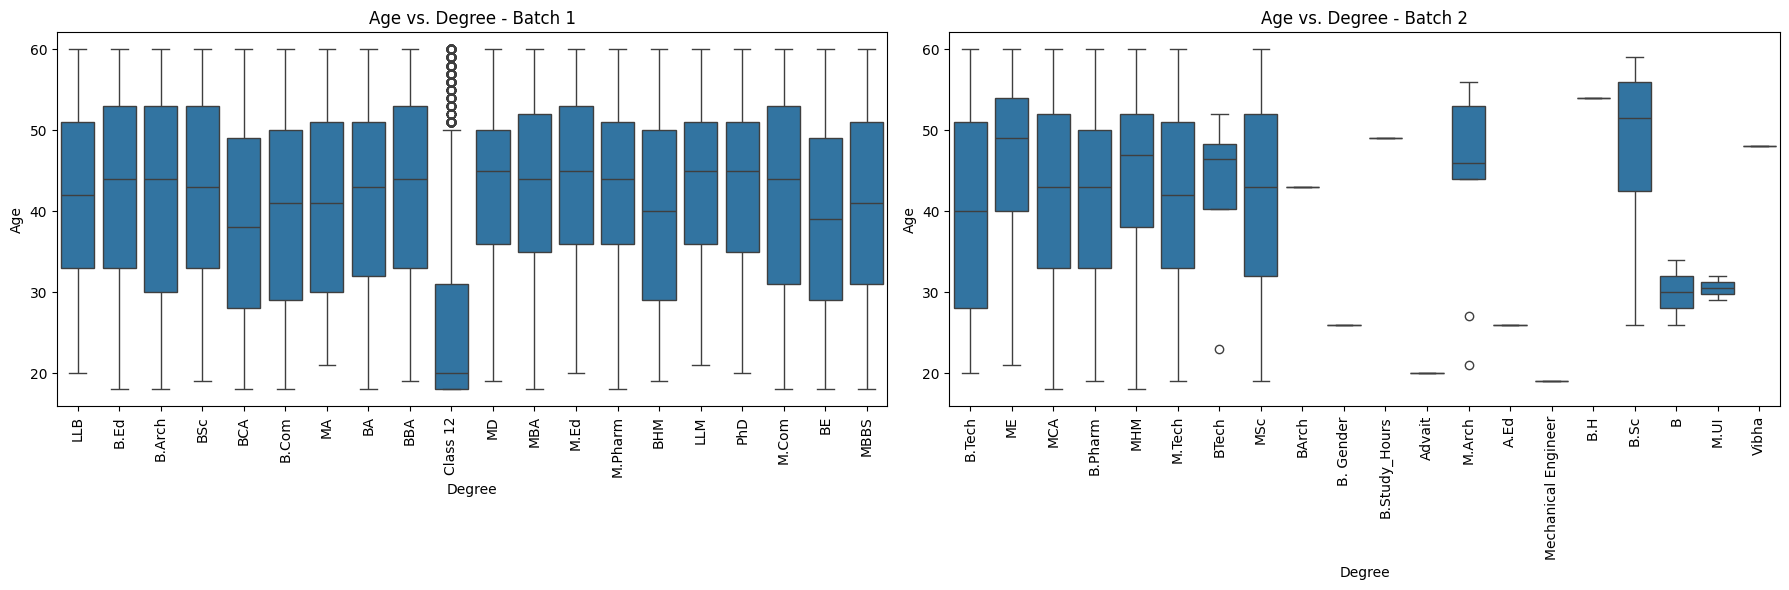

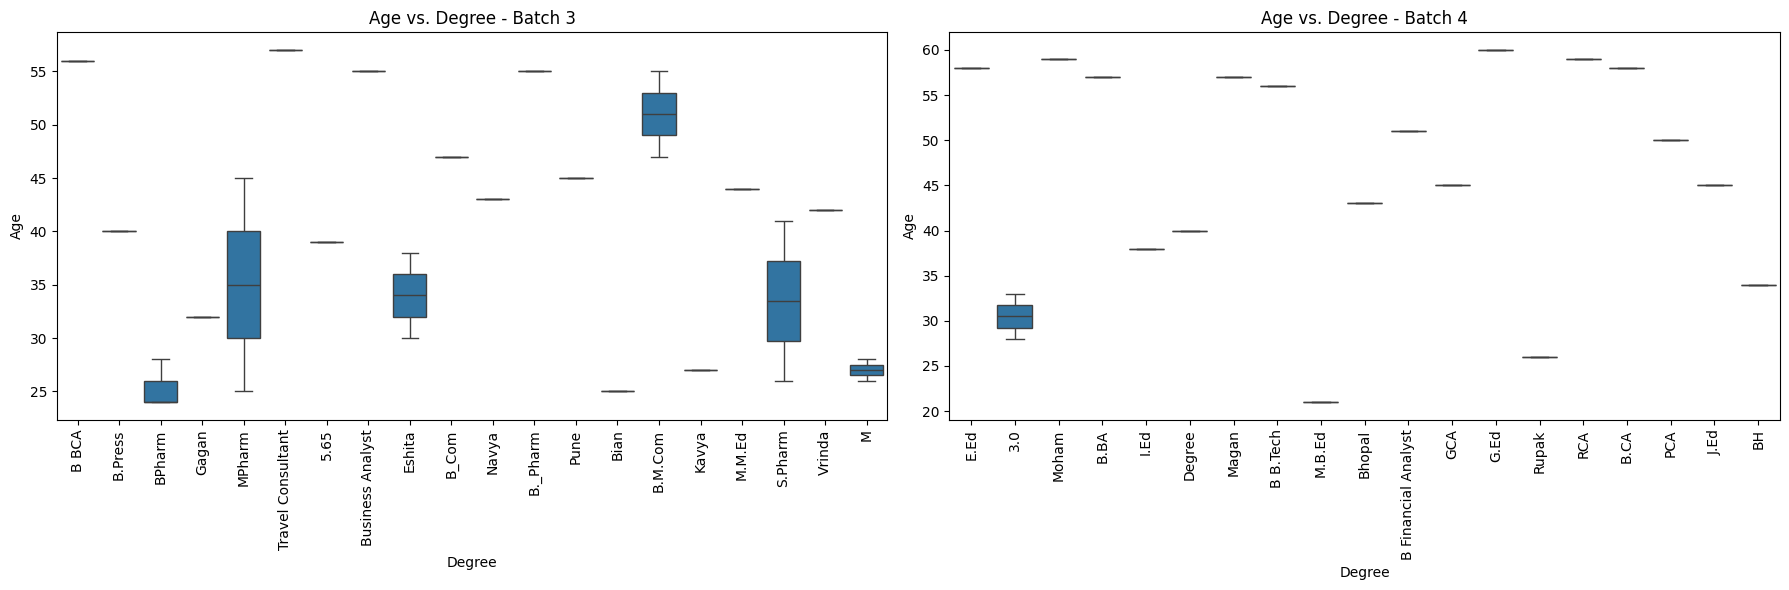

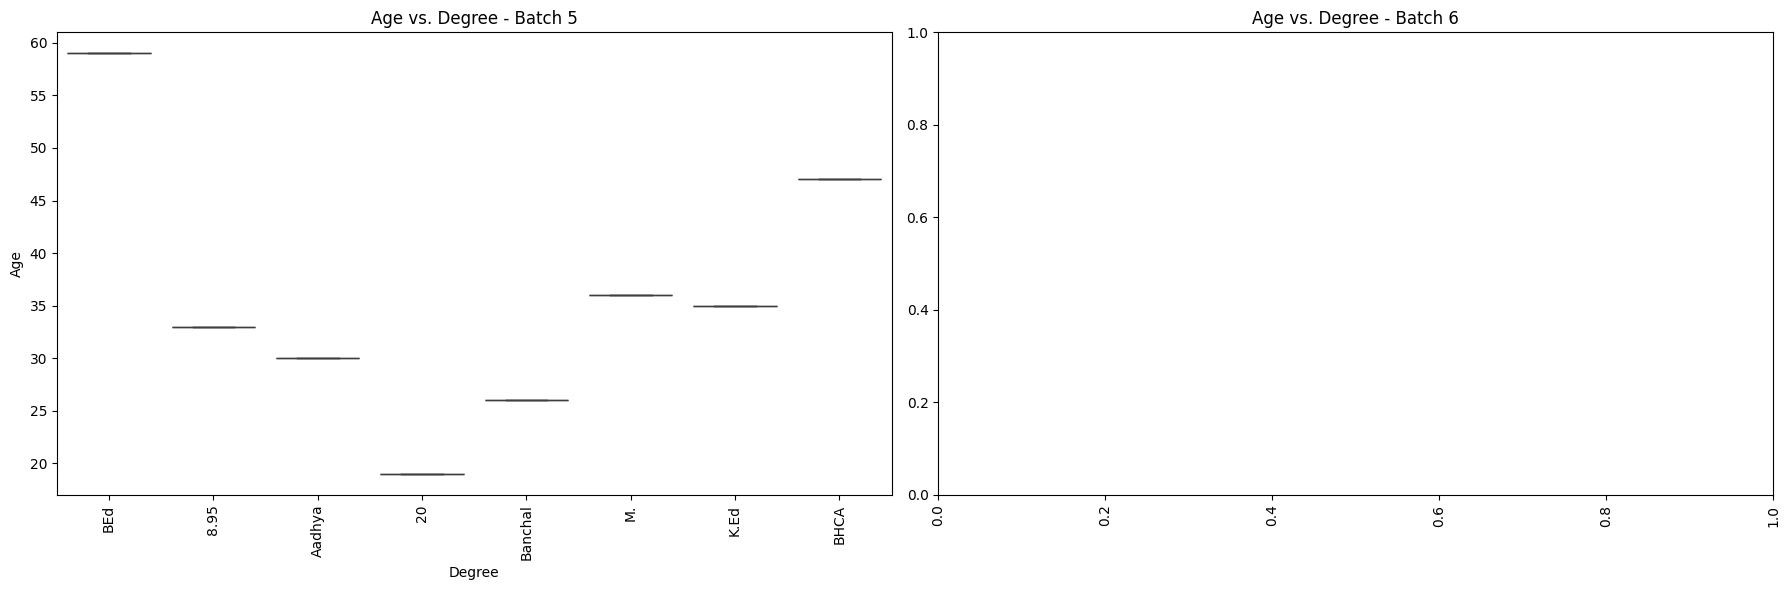

In [51]:
plot_numerical_vs_categorical(data, 'Age', 'Degree')

#### Insights:
- Most traditional academic degrees (e.g., BSc., BA., BCom, MSc., MA.) have a consistent age distribution, with median ages typically in the 40-50 range. This reflects a common age range for individuals who have completed undergraduate or postgraduate education
- Advanced degrees, such as M.Tech and other professional qualifications, generally attract an older population compared to undergraduate degrees. This aligns with expectations, as individuals often pursue these qualifications later in their careers
- The degree labels vary significantly, with some entries being clearly academic (e.g., B.Tech, B.Sc.) while others appear to be non-standard, like numeric values or specific individuals’ names, which do not correspond to academic degrees
- There are several data inconsistencies, including non-degree entries (e.g., names, random numbers, unrelated words). These entries introduce noise and may affect the analysis
- Certain degree categories have limited representation, showing only isolated points. These may represent outliers or niche qualifications and should be considered carefully

### Age vs. Financial Stress

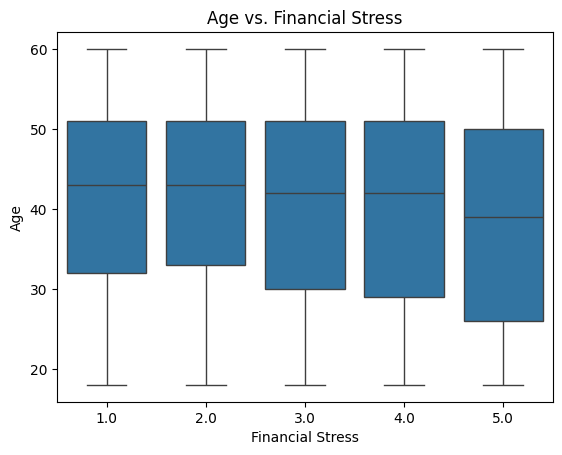

In [52]:
plot_numerical_vs_categorical(data, 'Age', 'Financial Stress')

#### Insights:
- Similar to the training set, the age distribution across financial stress levels appears relatively consistent, with a median age around 40-45 for each stress level
- The range of ages (from around 20 to 60) is also consistent across different financial stress levels, indicating that financial stress is spread across all ages
- There is a subtle decrease in the median age as financial stress level increases, especially noticeable in the highest stress level (5.0), where the median age appears slightly lower compared to levels 1 and 2. This trend is minimal but aligns with the training set observation
- The interquartile range (IQR) for each financial stress level is fairly similar, with only minor variations, indicating that financial stress levels do not significantly change across different age groups.

### Age vs. Had Suicidal Thoughts?

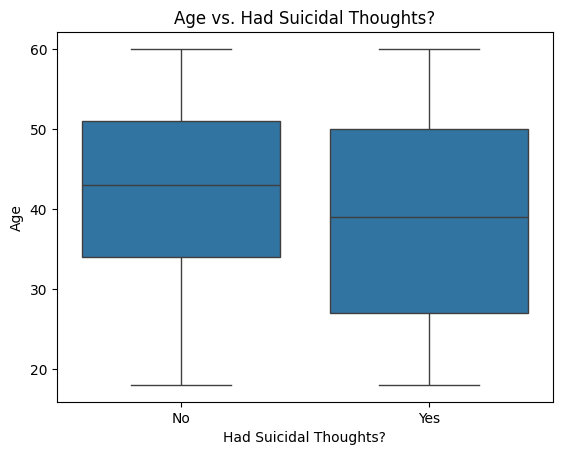

In [53]:
plot_numerical_vs_categorical(data, 'Age', 'Had Suicidal Thoughts?')

#### Insights:
- Both groups (those who had and had not had suicidal thoughts) show similar median ages around 40-45, suggesting no significant age difference between the two groups
- Ages in both groups span from around 20 to 60, indicating that suicidal thoughts are reported across a wide age spectrum
- The interquartile range (IQR) and spread are similar for both groups, with no notable variance in age distribution between those who reported suicidal thoughts and those who did not

### Age vs. Family History of Mental Illness

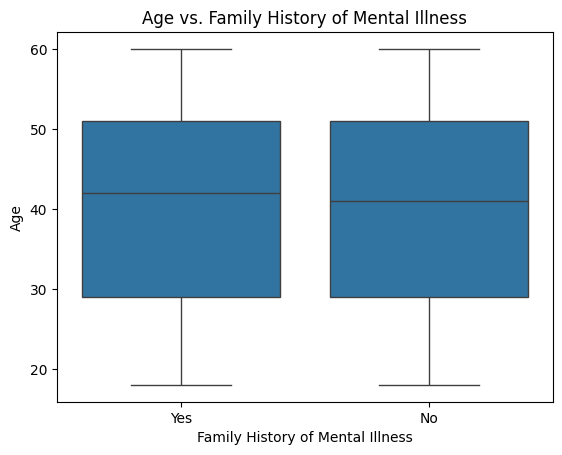

In [54]:
plot_numerical_vs_categorical(data, 'Age', 'Family History of Mental Illness')

#### Insights:
- Both groups (with and without a family history of mental illness) have a median age around the early 40s, indicating no significant difference in the central tendency of age based on family mental health history
- The age distribution for both categories is quite similar, with a wide spread from about 20 to 60 years. This suggests that the age factor is evenly distributed regardless of family mental health history
- The IQR for both categories appears comparable, showing that the middle 50% of ages for each group are almost identical.

### CGPA vs. Gender

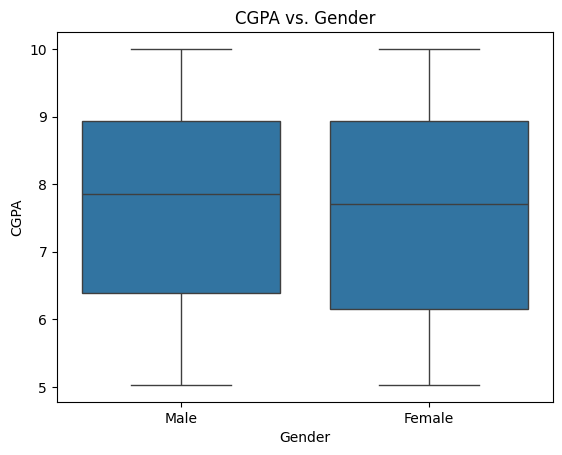

In [55]:
plot_numerical_vs_categorical(data, 'CGPA', 'Gender')

#### Insights:
- Both male and female groups have a median CGPA close to 8, indicating consistency in performance across genders in the test set
- The interquartile range (IQR) and the overall spread are similar for both genders, with CGPA values generally ranging from around 5 to 10
- There is no noticeable difference in CGPA distribution between genders, suggesting gender does not significantly impact CGPA in this sample

### CGPA vs. City

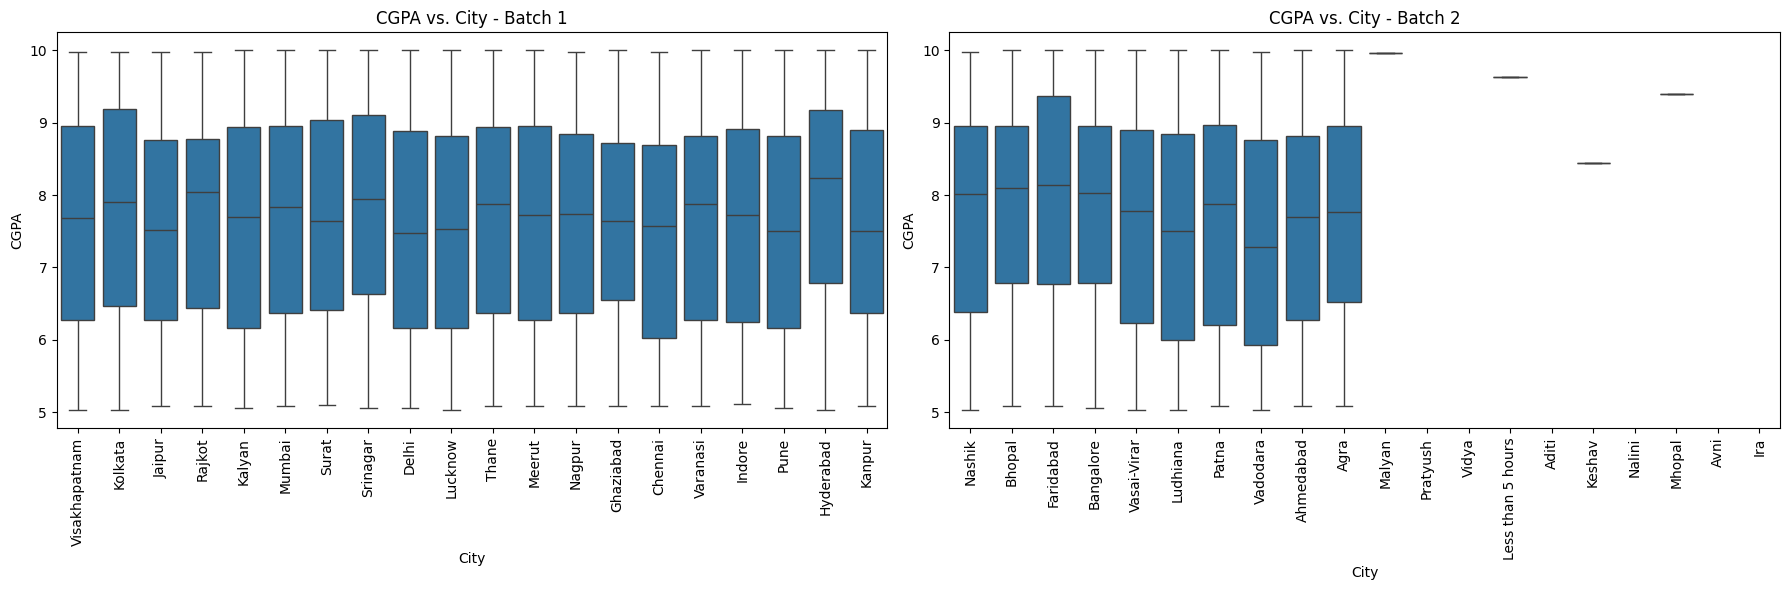

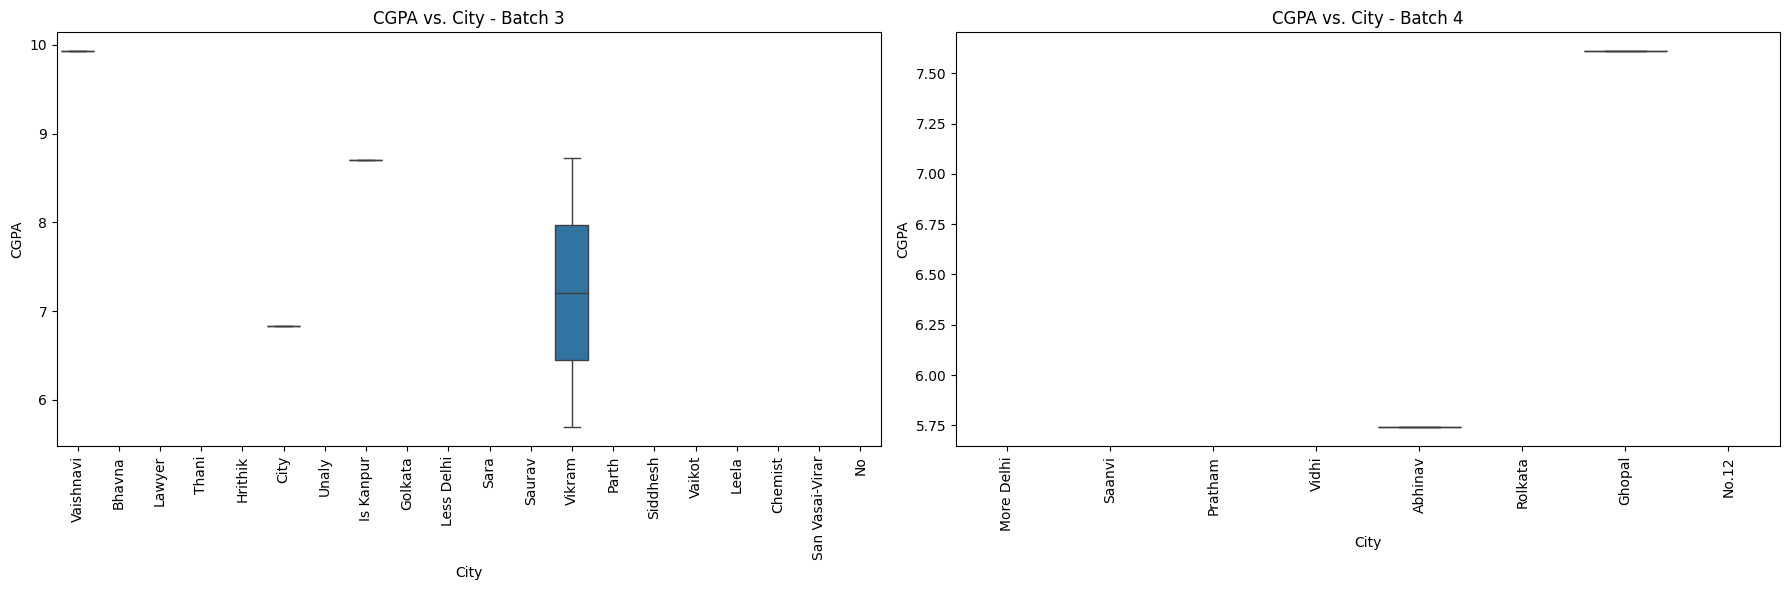

In [56]:
plot_numerical_vs_categorical(data, 'CGPA', 'City')

#### Insights:
- Similar to the training set, the CGPA distribution for most cities is centered between approximately 7 and 9. This indicates that academic performance, as measured by CGPA, remains relatively consistent across various locations in the test set
- Overall, CGPA appears fairly stable and does not show major differences by city, suggesting that location is not a significant factor influencing CGPA in the test set as well

### CGPA vs. Working Professional or Student

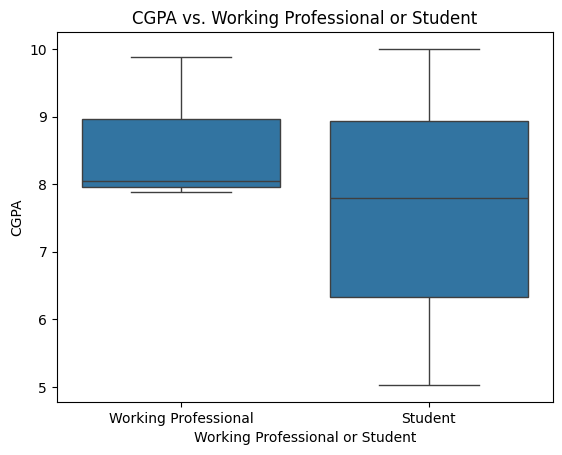

In [57]:
plot_numerical_vs_categorical(data, 'CGPA', 'Working Professional or Student')

#### Insights:
- Working Professionals show a compact CGPA range, primarily between 8 and 9, with minimal variation. This suggests consistent academic performance levels for working professionals in the test set
- Students display a wider range in CGPA, extending from approximately 6 up to close to 10. This indicates greater variability among students’ academic performance, similar to the trend seen in the training set
- The CGPA distribution for working professionals is relatively high, with most values clustered near 8-9, while students’ CGPAs have a broader spread
- The wider range among students could be due to differing academic pressures or motivations, while the more compact range among working professionals likely reflects the dataset's skewed composition, with 80% being working professionals
- Both groups have a median CGPA around 8, but the distribution for students is less consistent, with a larger spread, indicating more diverse academic outcomes among students.


### CGPA vs. Study Satisfaction

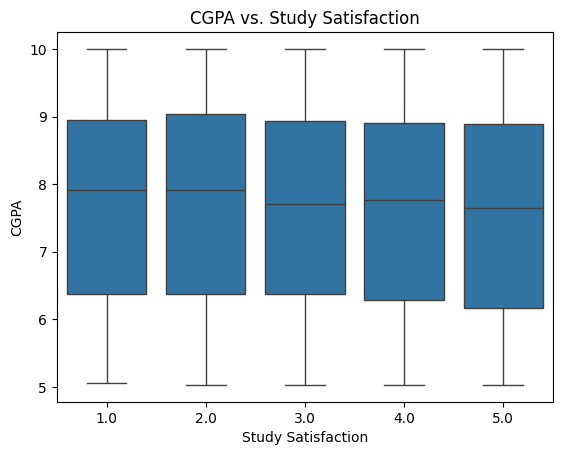

In [58]:
plot_numerical_vs_categorical(data, 'CGPA', 'Study Satisfaction')

#### Insights:
- Similar to the training set, the median CGPA remains stable across different levels of study satisfaction, suggesting that satisfaction levels do not significantly impact CGPA
- The range of CGPA values is consistent across satisfaction levels, indicating that students achieve a wide variety of CGPAs regardless of how satisfied they feel about their studies
- This stability implies that while study satisfaction is an important factor for student experience, it may not directly correlate with measurable academic performance (CGPA) in this dataset

### CGPA vs. Job Satisfaction

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


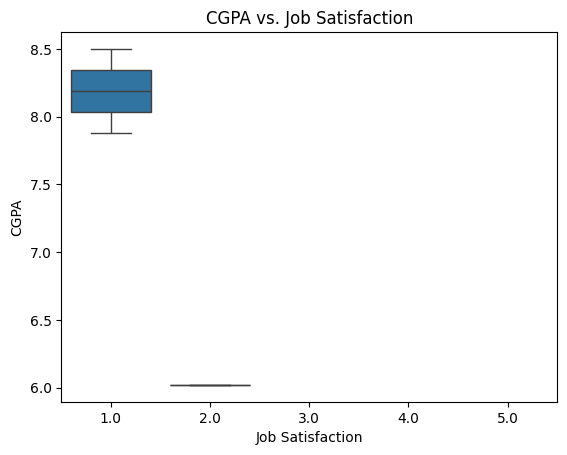

In [59]:
plot_numerical_vs_categorical(data, 'CGPA', 'Job Satisfaction')

#### Insights:
- The plot displays data for only a couple of job satisfaction levels (primarily levels 1 and 2), indicating an imbalanced distribution or missing data for other satisfaction levels
- For individuals reporting low job satisfaction (level 1), the CGPA values are concentrated around 8. This concentration suggests that a high CGPA might be present regardless of low job satisfaction, especially among students in the test set
- At job satisfaction level 2, CGPA values show a distinct drop with scores closer to 6. This suggests a small subset where lower job satisfaction correlates with a markedly lower CGPA, although this observation is limited to only a few data points
- Given that 80% of the dataset consists of working professionals, the limited variation in job satisfaction levels may reflect this bias, as working professionals' job satisfaction might not strongly correlate with academic performance, reflected by CGPA

### CGPA vs. Academic Pressure

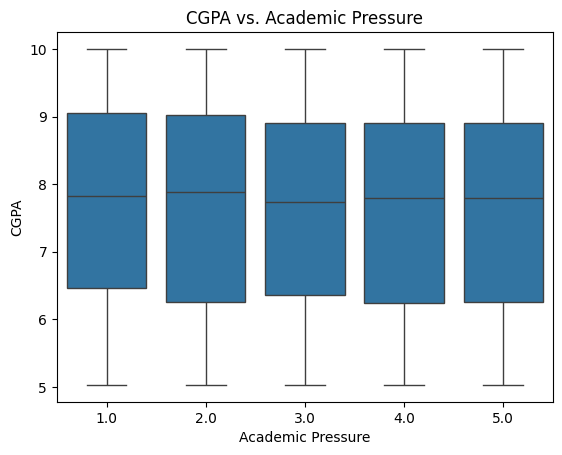

In [60]:
plot_numerical_vs_categorical(data, 'CGPA', 'Academic Pressure')

#### Insights:
- Similar to the previous set, CGPA values remain stable across different academic pressure levels, with medians clustering around 8. This indicates that changes in academic pressure may not significantly impact CGPA outcomes
- The CGPA range from approximately 5 to 10 is maintained across all pressure levels, indicating that academic performance (as measured by CGPA) spans broadly irrespective of perceived pressure
- There is no visible trend (increase or decrease) in CGPA as academic pressure increases or decreases, suggesting that other factors may contribute more substantially to academic performance than the level of academic pressure alone

### CGPA vs. Work/Study Hours

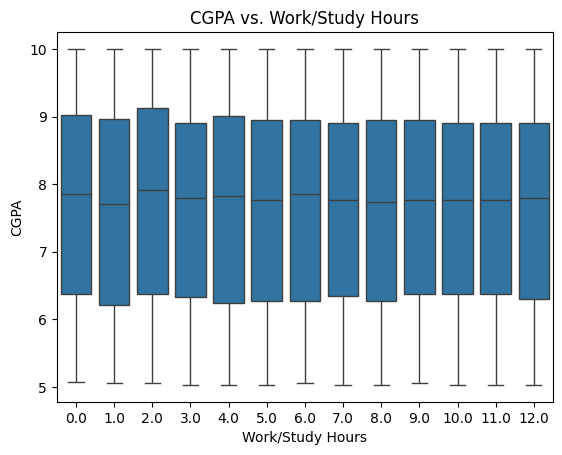

In [61]:
plot_numerical_vs_categorical(data, 'CGPA', 'Work/Study Hours')

#### Insights:
- The median CGPA values remain relatively stable across different work/study hour categories, with a central tendency around 8. This indicates that the number of hours spent on work or study does not significantly impact the CGPA in this test set
- Each category of work/study hours displays a broad range of CGPA scores, from around 5 to 10. This suggests that individuals with varied academic performance levels (high and low CGPAs) dedicate both limited and extensive hours to work or study, indicating no clear pattern
- The lack of an observable trend as work/study hours increase reinforces the idea that CGPA may be influenced more by other factors (such as study effectiveness or external support) than by time investment alone

### CGPA vs. Sleep Duration

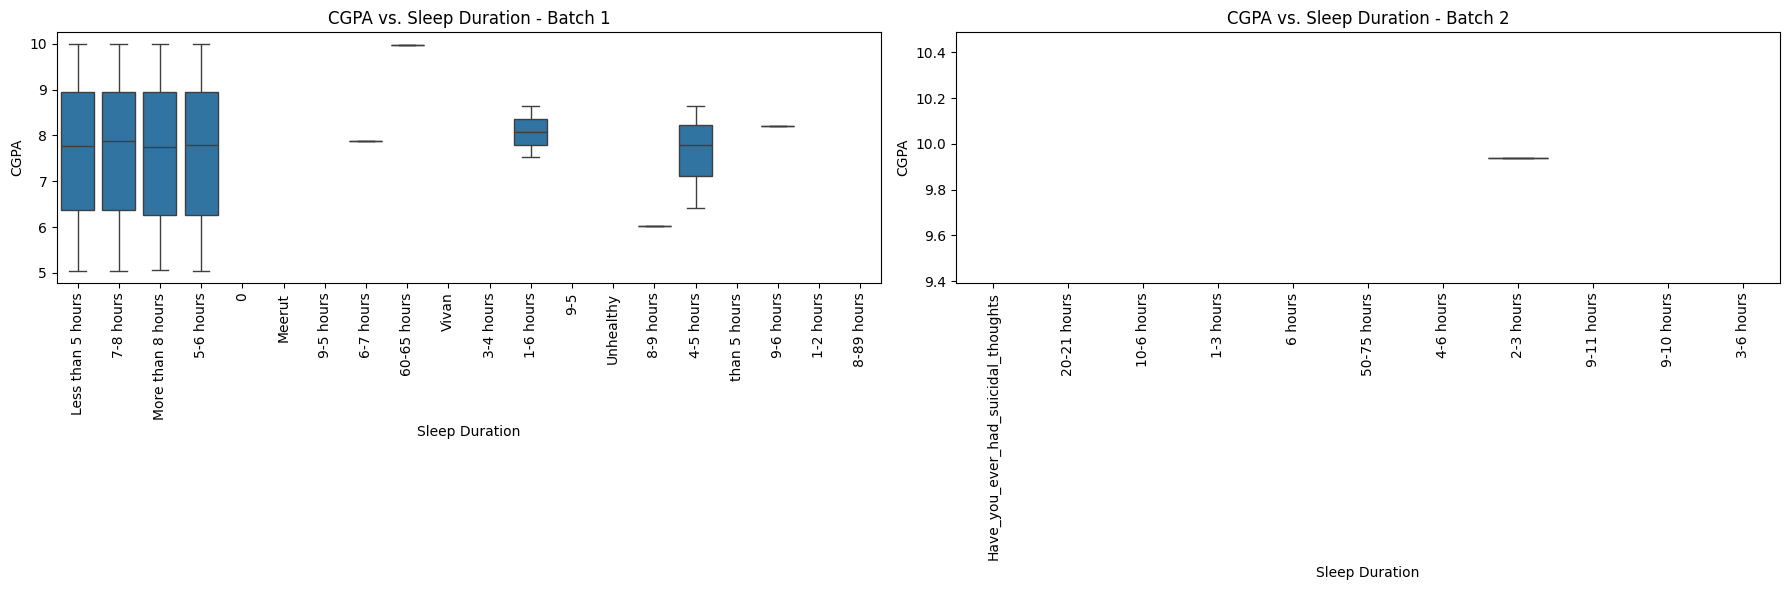

In [62]:
plot_numerical_vs_categorical(data, 'CGPA', 'Sleep Duration')

#### Insights:
- Similar to the training dataset, the common sleep duration categories like "7-8 hours," "More than 8 hours," "5-6 hours," and "Less than 5 hours" display a relatively stable range of CGPA values around the 7-9 range. This suggests that within typical sleep durations, there is no significant variation in CGPA, reinforcing that moderate sleep habits do not heavily influence academic performance
- Categories with non-standard or undefined sleep duration labels (e.g., "9-5," "Work_Study_Hours," or specific numbers without units) show wide CGPA variability, likely due to data inconsistencies or minimal sample sizes in these groups
- While there are some variations in CGPA by sleep duration, especially at the extremes, the lack of a clear trend across most categories suggests that other factors may be more critical determinants of CGPA

### CGPA vs. Dietary Habits

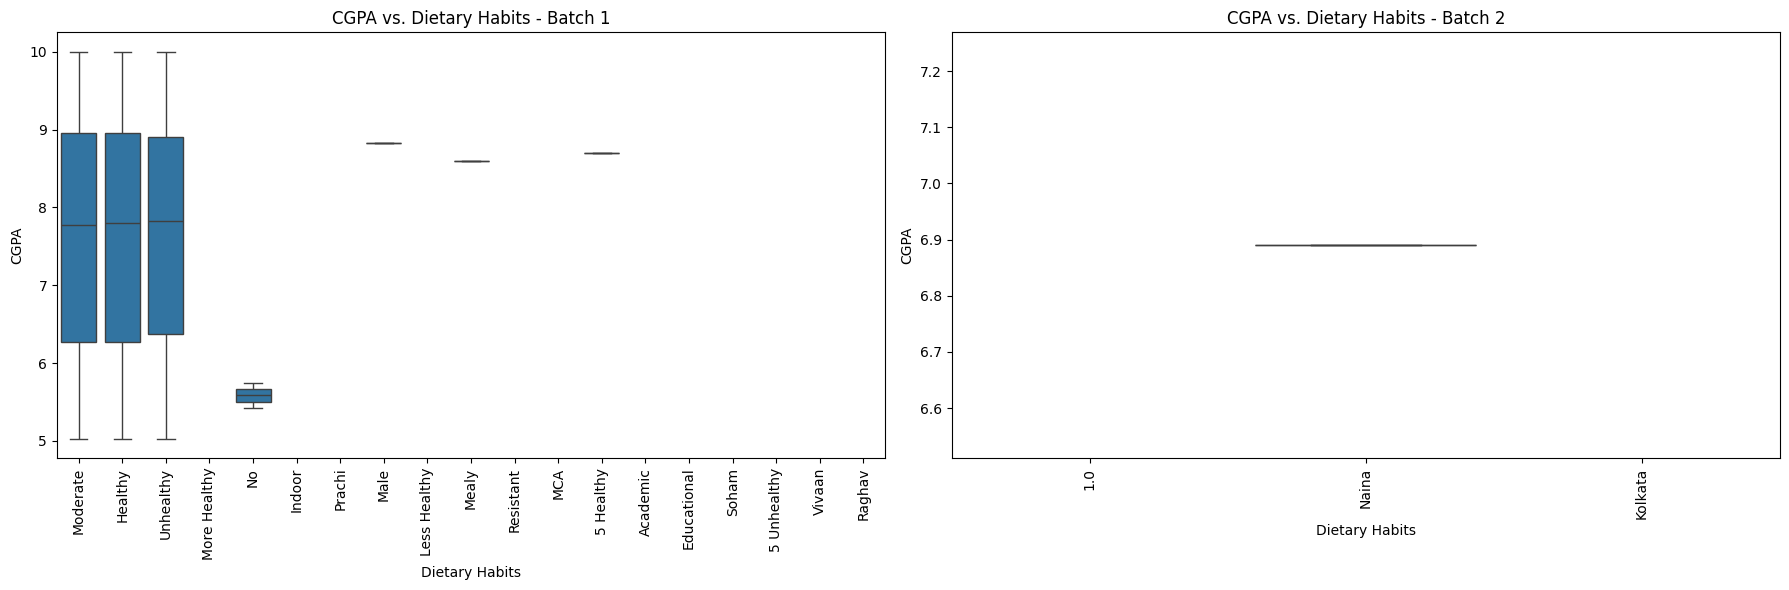

In [63]:
plot_numerical_vs_categorical(data, 'CGPA', 'Dietary Habits')

#### Insights:
- As seen in the training set, the main dietary categories—"Moderate," "Healthy," and "Unhealthy"—exhibit a consistent CGPA distribution with median values around 8. This stability suggests that common dietary patterns do not have a pronounced impact on academic performance
- Some non-standard dietary labels, such as "No," have lower CGPA values, indicating that individuals in these categories may experience challenges affecting their academic performance. However, these cases are limited and may represent outliers
- Categories like "Prachi," "Soham," or "5 Unhealthy" appear again as miscellaneous labels, likely due to data entry inconsistencies
- Overall, the data does not suggest a strong link between dietary habits and CGPA, as the majority of students maintain similar CGPA levels regardless of dietary category. The variations that do exist are minimal and primarily seen in unusual or outlier categories

### CGPA vs. Degree

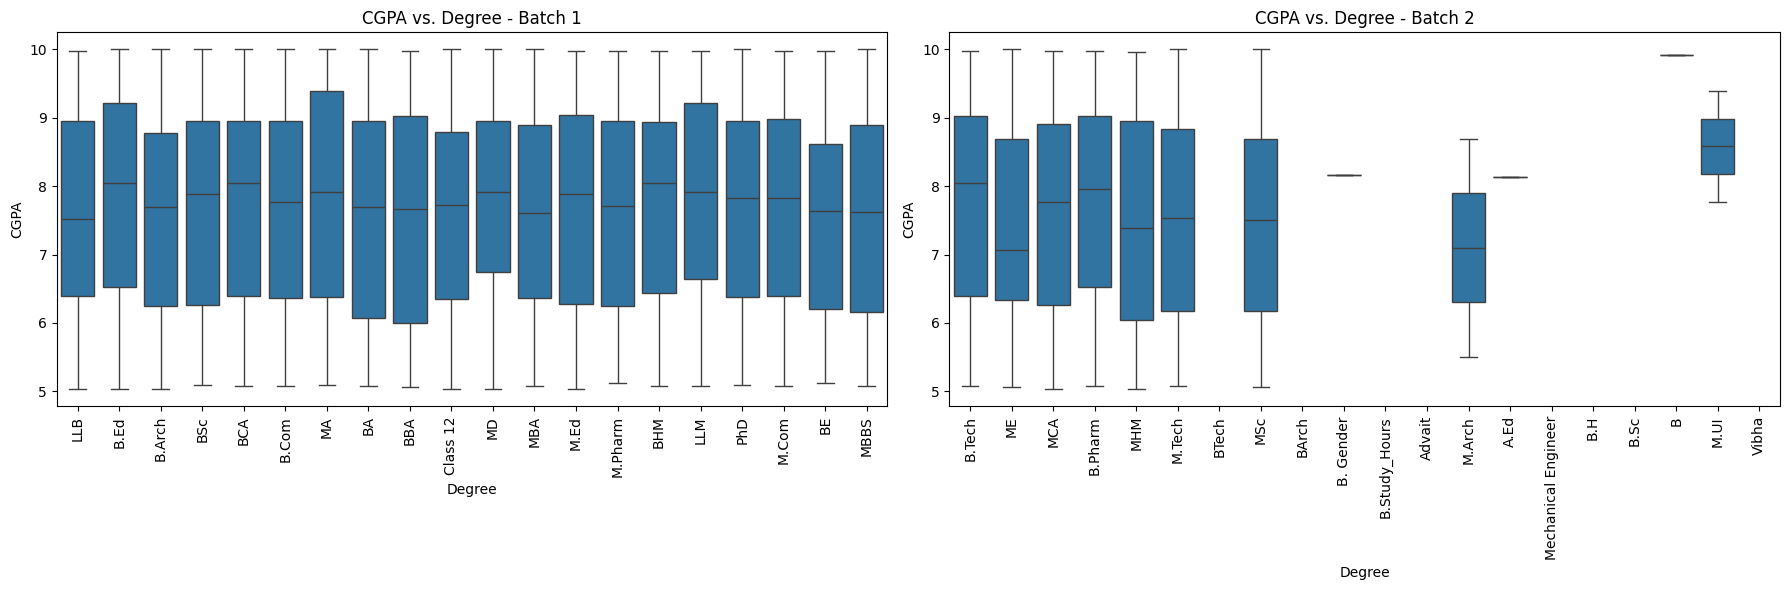

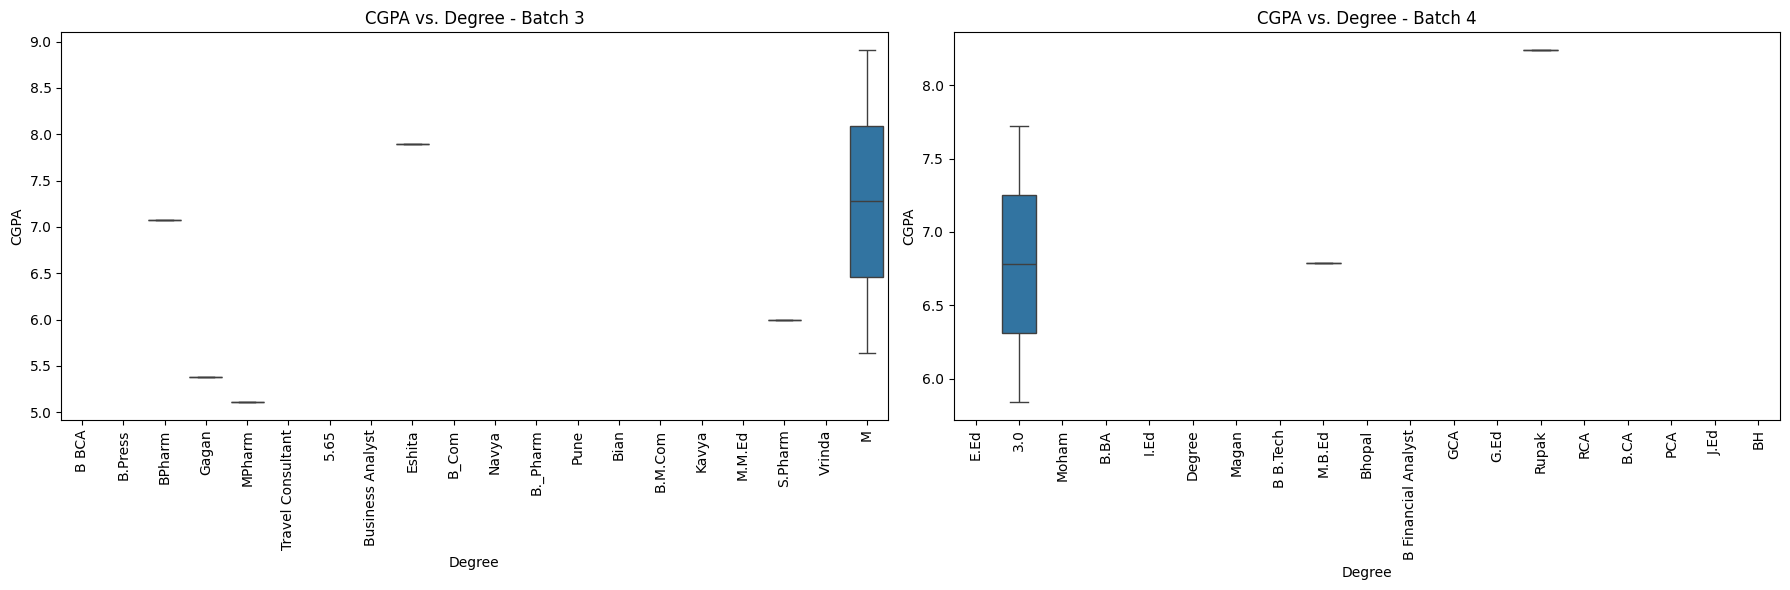

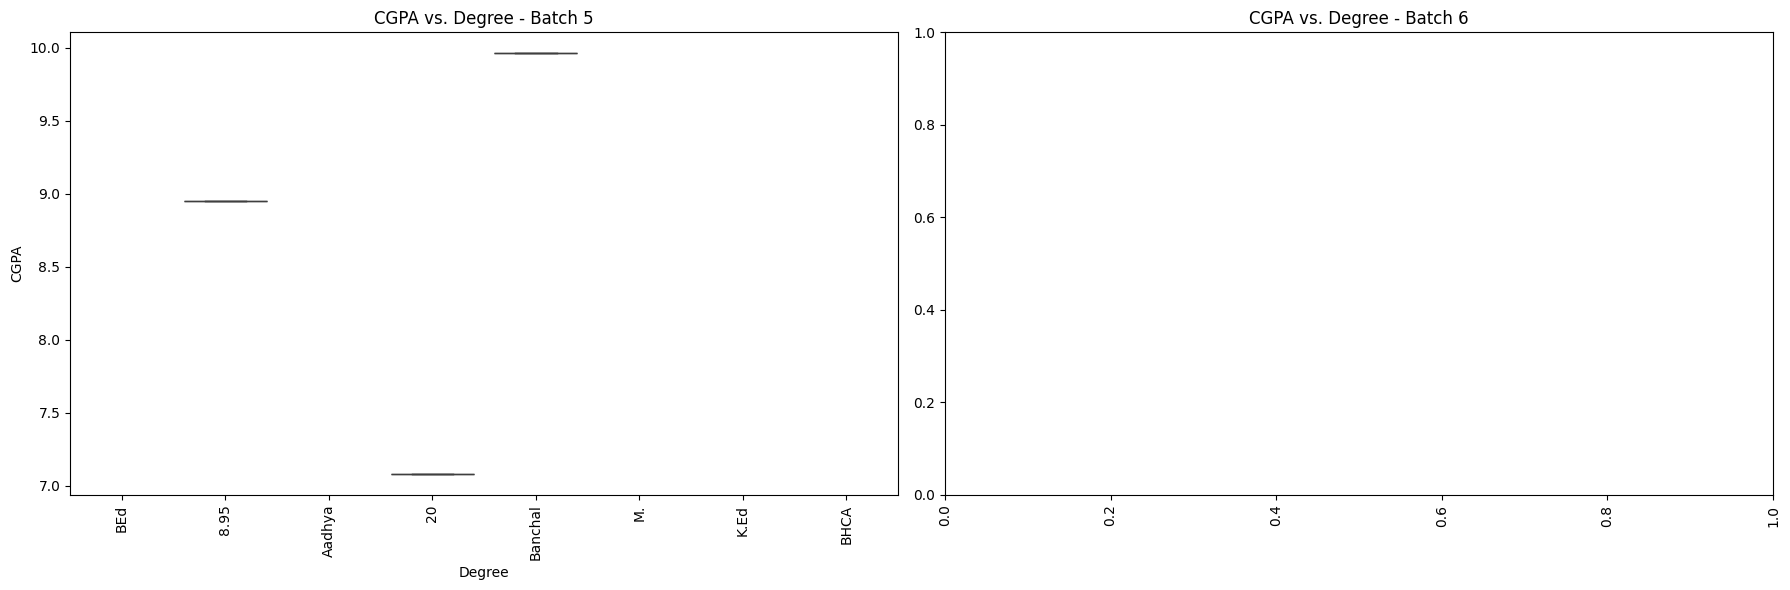

In [64]:
plot_numerical_vs_categorical(data, 'CGPA', 'Degree')

#### Insights:
- Popular degrees such as B.Com, B.Tech, MBA, and B.Sc maintain a fairly consistent CGPA range, typically between 7 and 9, suggesting stable academic performance for students across these degrees. This consistency implies standardized academic expectations in these fields
- Degrees such as MCA, ME, and B.Pharma display a wider spread in CGPA values, indicating potential differences in academic challenges or grading standards in these fields
- There are entries like “Gender” and “3.0” in the degree category, which appear to be data inconsistencies. Such entries may need to be cleaned up to improve the reliability of analysis based on academic degrees
- Less common degrees, like M.Tech and CA, show individual outliers with either high or low CGPA values. However, these data points are limited, so they may not provide strong insights without further data
- Despite some variances, most degrees show a stable CGPA distribution, indicating that students' academic performances are generally aligned across different fields, with outliers or unique degrees showing broader ranges

### CGPA vs. Financial Stress

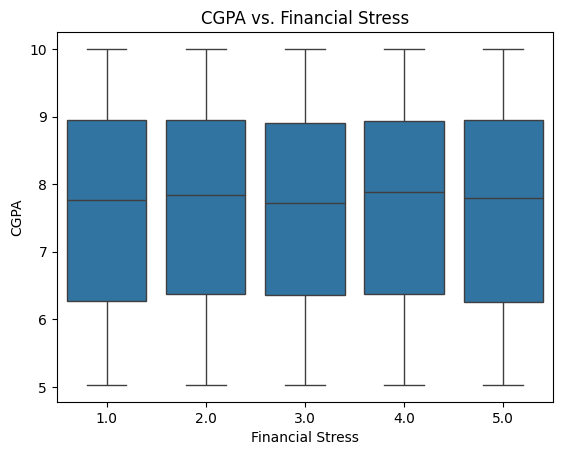

In [65]:
plot_numerical_vs_categorical(data, 'CGPA', 'Financial Stress')

#### Insights:
- The boxplots show a relatively consistent median CGPA around 7.5–8 across all levels of financial stress (1 to 5). This suggests that financial stress, at least in this dataset, does not have a significant impact on students' CGPA scores
- Each financial stress level shows a broad interquartile range and a similar spread in CGPA, from around 5 to nearly 10. This indicates a diversity in academic performance that is unaffected by financial stress levels
- There is no visible trend where CGPA consistently increases or decreases with financial stress. This lack of correlation implies that academic performance, as measured by CGPA, remains relatively unaffected by varying levels of financial stress

### CGPA vs. Had Suicidal Thoughts?

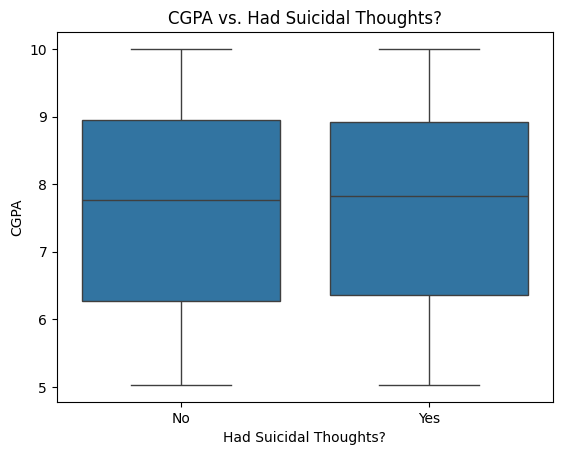

In [66]:
plot_numerical_vs_categorical(data, 'CGPA', 'Had Suicidal Thoughts?')

#### Insights:
- The median CGPA is very close for individuals who answered "Yes" and "No" regarding suicidal thoughts. This similarity in medians suggests that CGPA is not significantly different between the two groups, aligning with what was observed in the training set
- Both groups show a wide distribution of CGPA values, with CGPAs ranging from around 5 to nearly 10. This wide range suggests that academic performance, as measured by CGPA, is influenced by various factors and not solely by the presence of suicidal thoughts
- The distribution patterns are largely consistent across both groups, reinforcing the observation that suicidal thoughts do not have a discernible impact on CGPA levels
- The pattern in the test set closely mirrors the training set, adding robustness to the finding that suicidal thoughts are not strongly associated with variations in CGPA in this dataset

### CGPA vs. Family History of Mental Illness

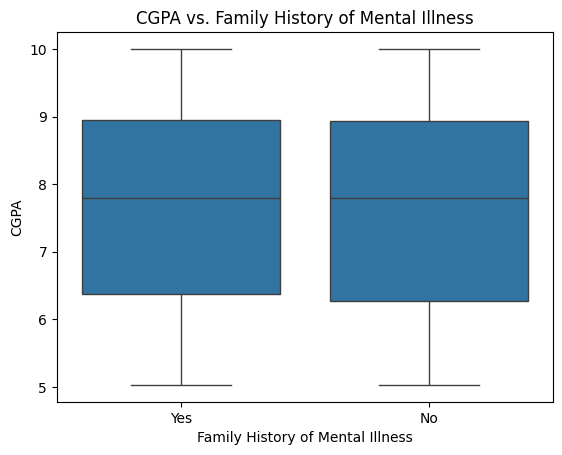

In [67]:
plot_numerical_vs_categorical(data, 'CGPA', 'Family History of Mental Illness')

#### Insights:
- Both groups (with and without a family history of mental illness) have a similar median CGPA. This indicates that family history of mental illness does not appear to impact the central tendency of academic performance, as measured by CGPA
- The range of CGPA values is similar across both groups, with CGPAs spanning from approximately 5 to around 10. This wide range suggests that CGPA variability is relatively unaffected by whether or not there is a family history of mental illness
- This pattern is consistent with the findings from the training set, reinforcing the observation that family history of mental illness is not a strong factor influencing CGPA

### Gender vs. City

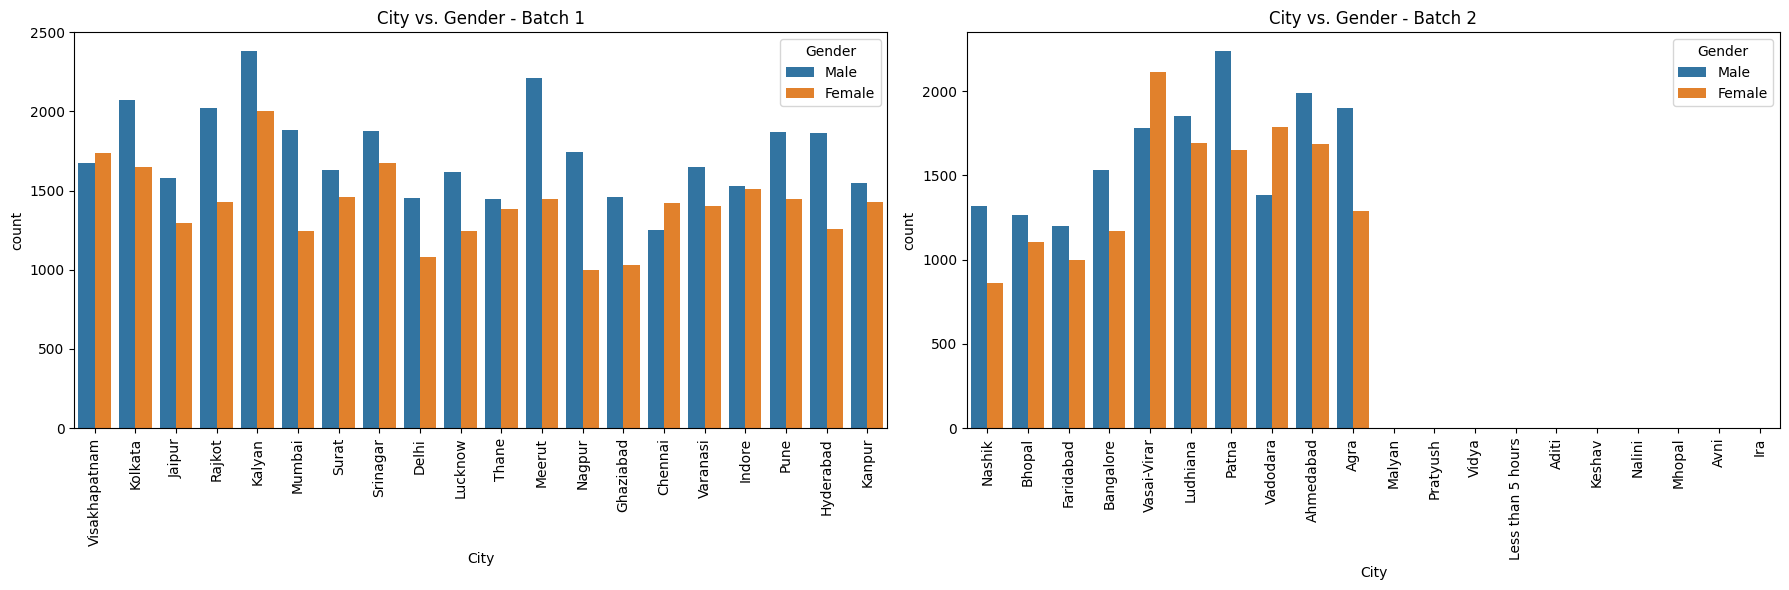

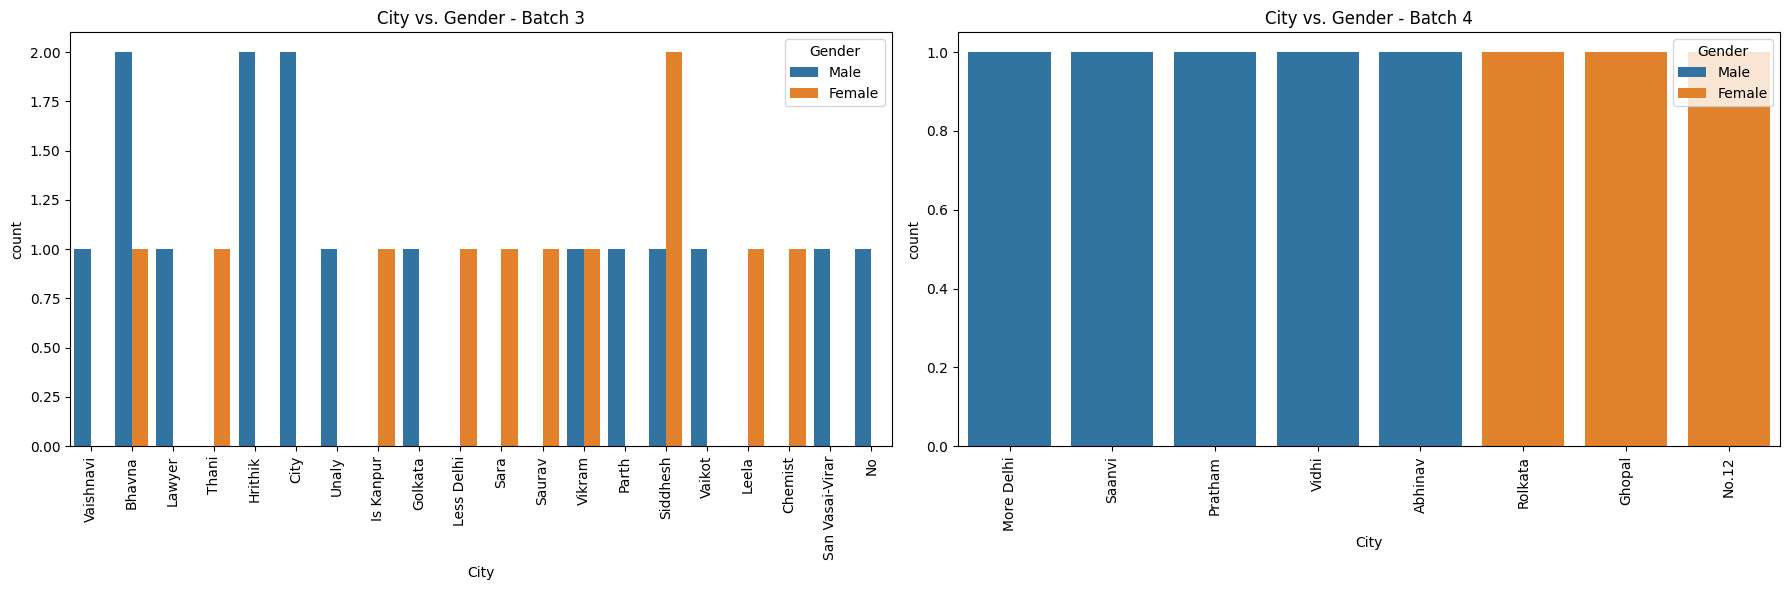

In [68]:
plot_categorical_vs_categorical(data, 'Gender', 'City')

#### Insights:
- Similar to the training set, larger cities such as Vishakhapatnam, Kolkata, and Bangalore show relatively balanced counts of male and female participants, indicating a representative sampling across genders in major urban areas
- Certain cities still exhibit a gender imbalance. For example, in some mid-sized and smaller cities, the distribution leans more towards one gender, which could be due to either sample size limitations or specific regional gender dynamics in participation
- The third and fourth batches reveal cities with very low counts, often only one or two participants. These smaller samples display an erratic pattern in gender representation, where some cities have only male or female participants. This could indicate either a limited reach of the survey or less participation from these locations
- In cities like "Less than 5 Hours" and "No," the labeling may suggest data entry issues or non-standard responses, leading to very low and potentially unreliable gender data

### Gender vs. Working Professional or Student

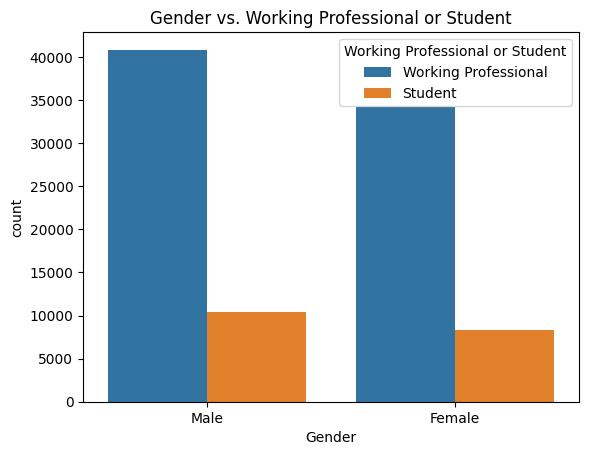

In [69]:
plot_categorical_vs_categorical(data, 'Gender', 'Working Professional or Student')

#### Insights:
- Similar to the training set, working professionals dominate in both male and female categories, aligning with the dataset's overall composition of 80% working professionals.
- The count of male working professionals is slightly higher than female working professionals, reflecting consistent trends seen in the training set
- Among students, the distribution between male and females appears relatively balanced but with lower overall count compared to working professionals
- The ratio of professionals to students appears consistent across genders, showing no significant deviation from the training set trends